# Week 1: Introduction to QTA

POP77142 Quantitative Text Analysis for Social Scientists

Tom Paskhalis

## Overview

-   Text as data
-   Data collection
-   Web technologies
-   HTML fundamentals
-   XPath

# Text As Data

## Textual Data

-   Ubiquitous
-   Yet often underutilized

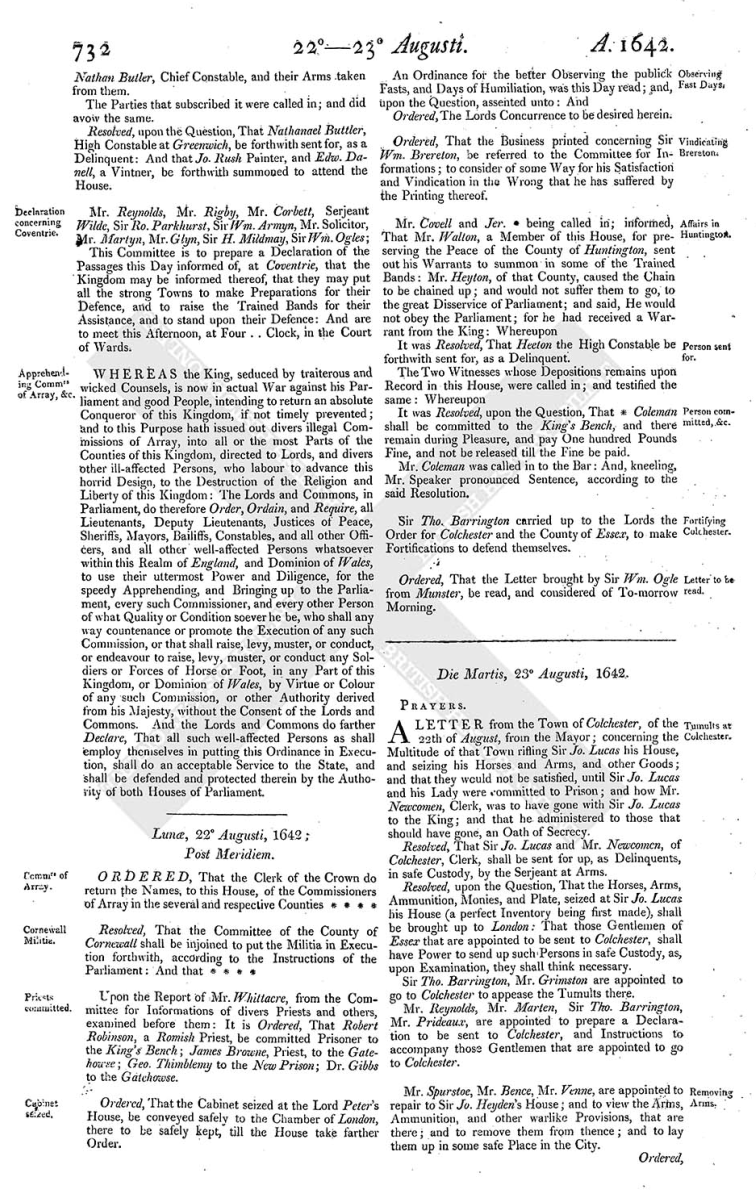

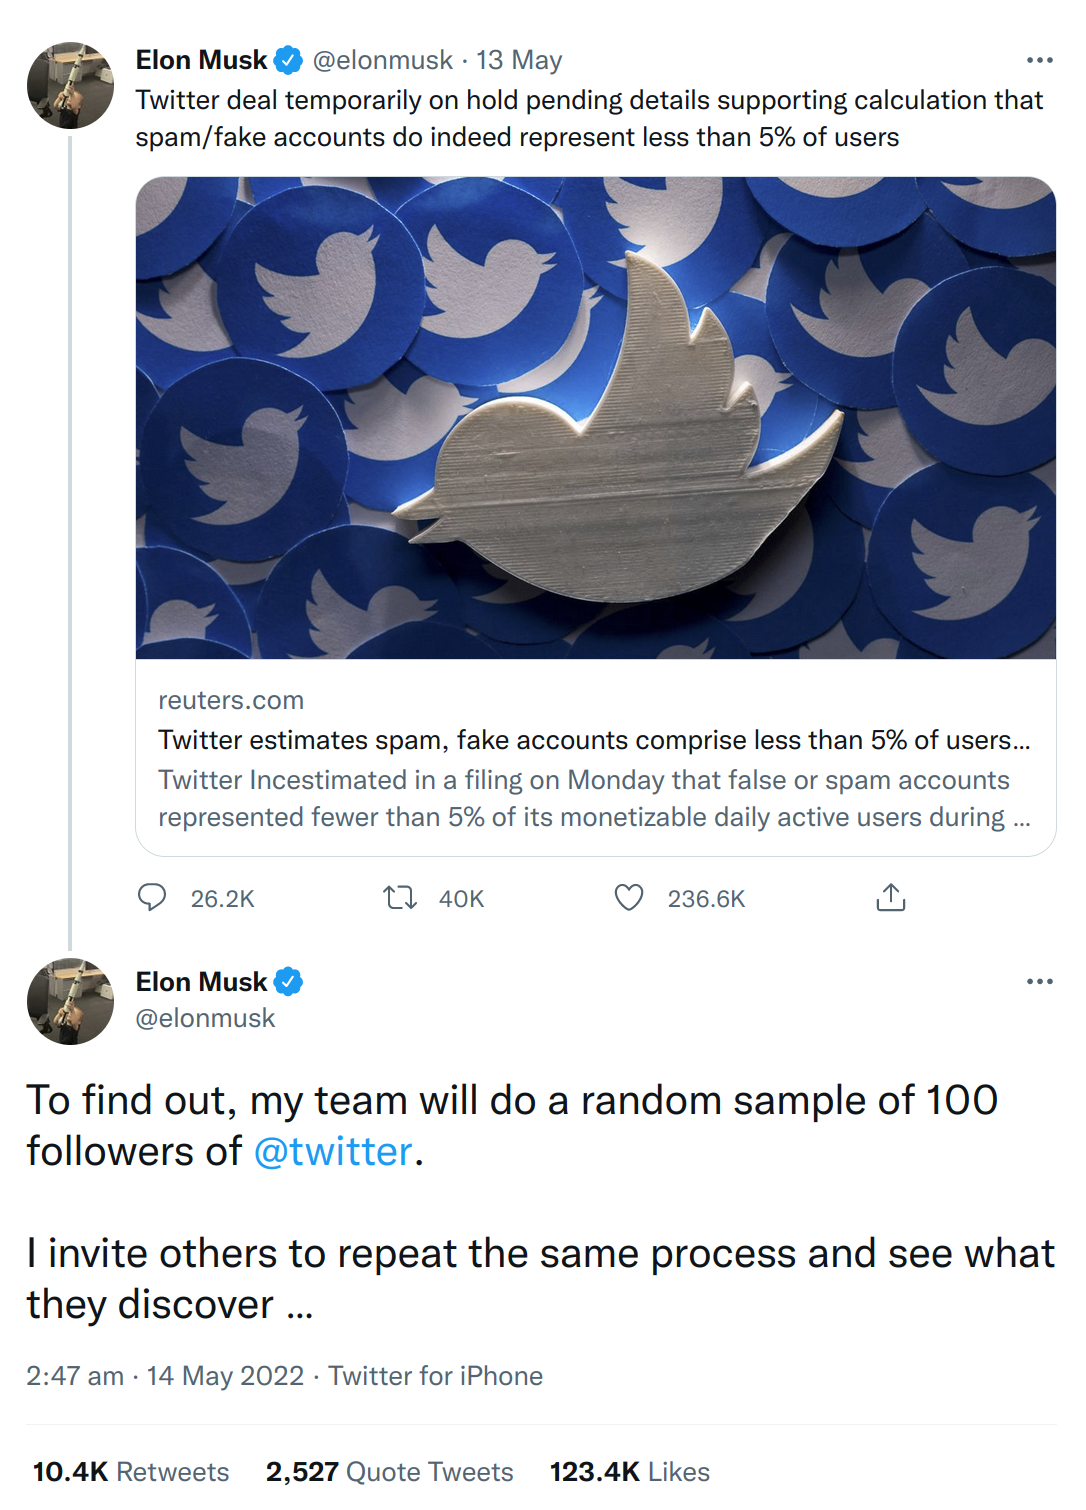

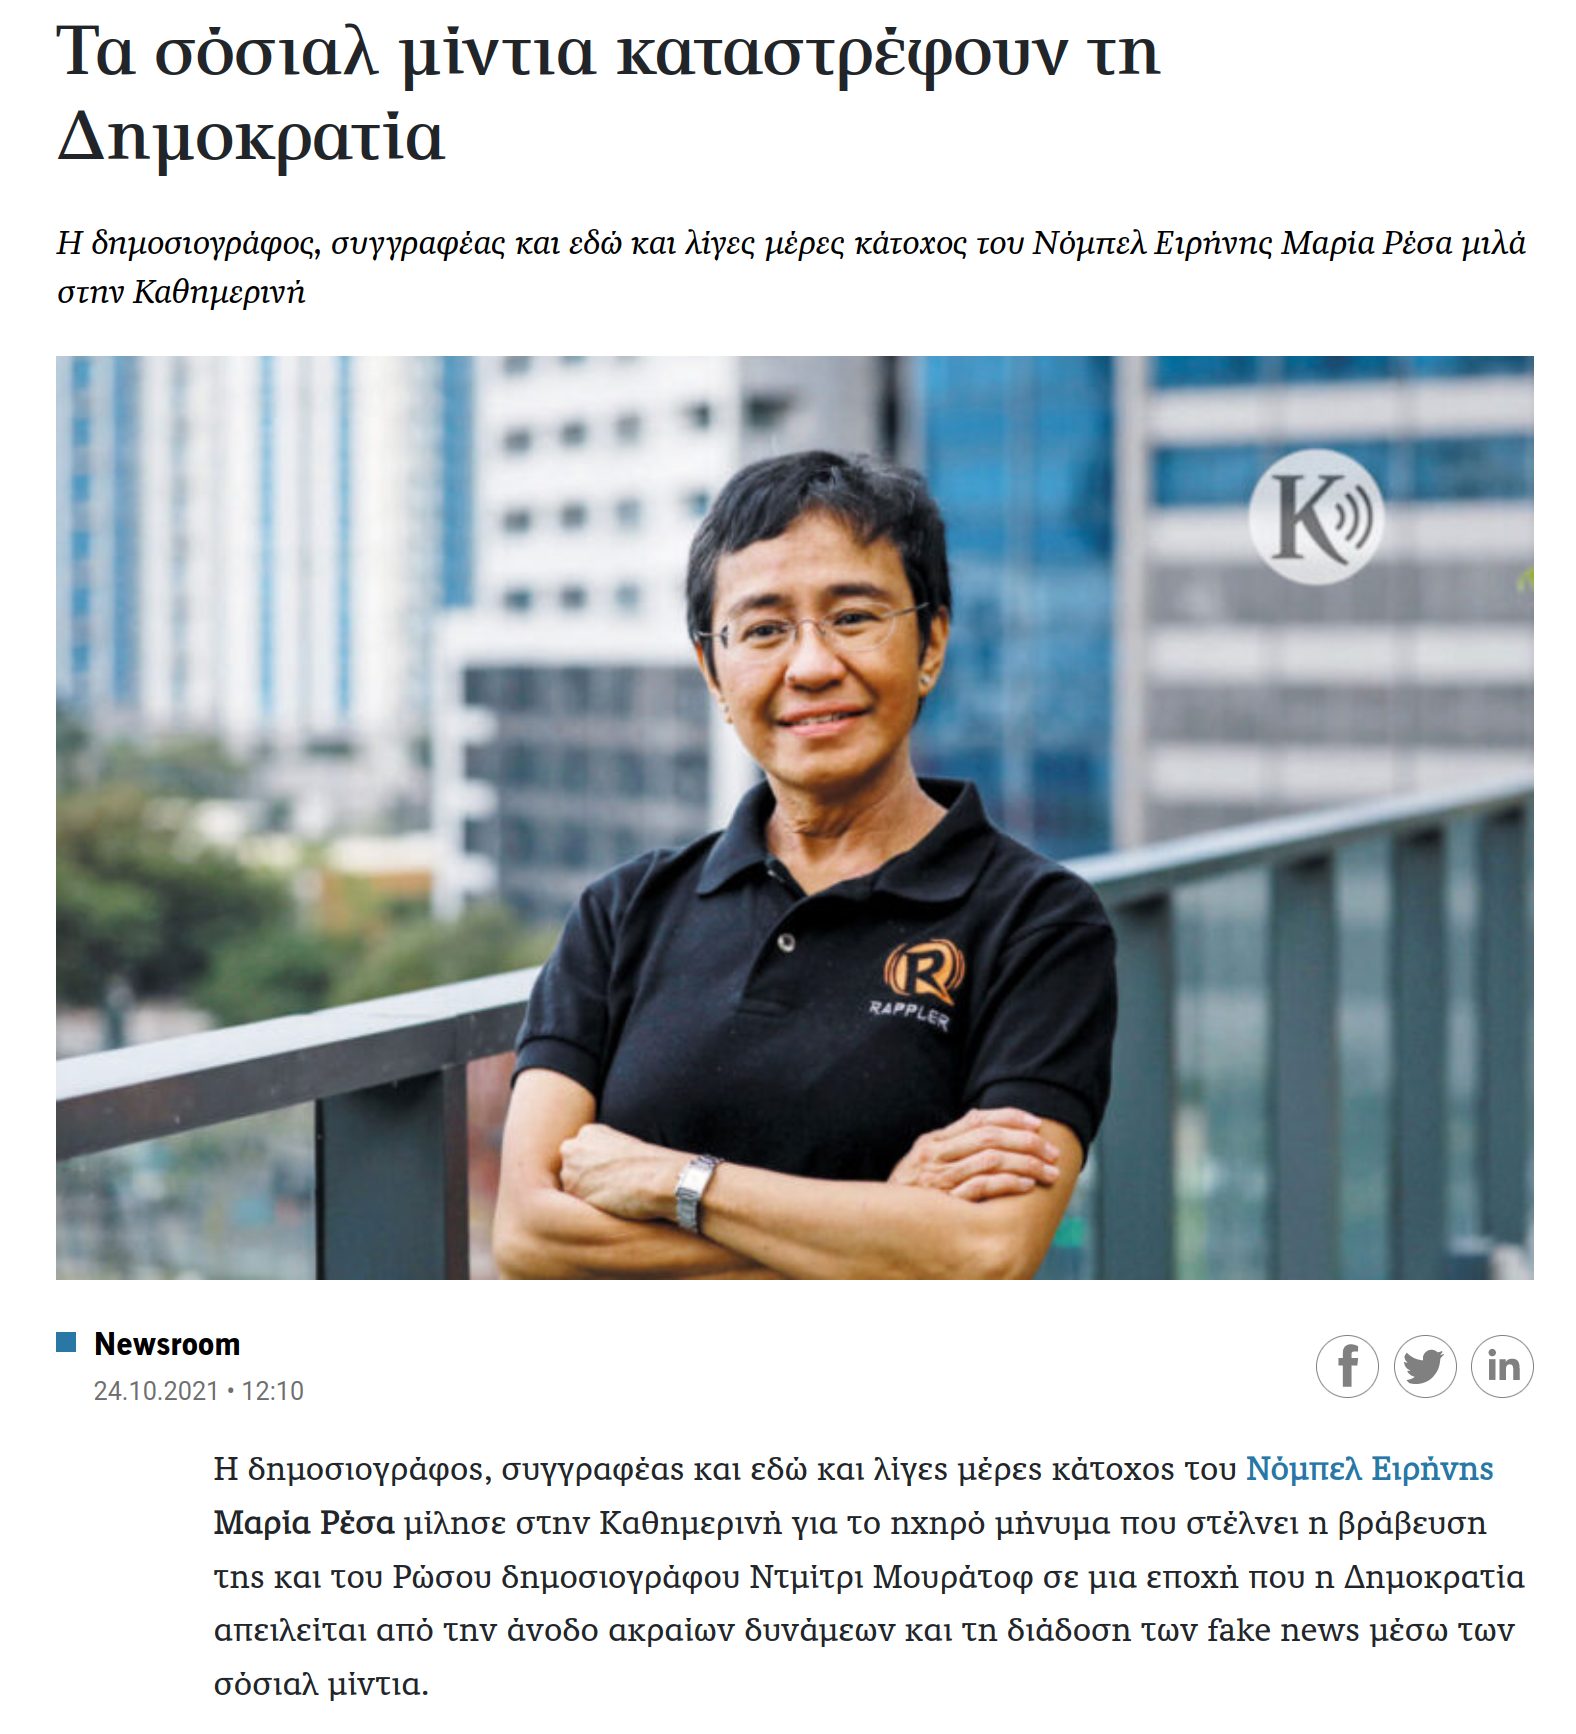

# Web Scraping

## Online Data Sources

-   Data downloadable in tabular format (E.g. CSV/TSV, XLS, DTA, etc.)
-   Data available online as a table (E.g. webpages with rendered
    tables)
-   Unstructured data available online (E.g. simple webpages)
-   Interactive webpages with user-input (E.g. webpages with logins,
    dropdown menus)
-   Web APIs (special interfaces for querying, e.g. Twitter, Google)

## Online Data Collection

-   Tabular format: download single or multiple files (automate with
    `download.file()` in R, `wget` in Python/Terminal)
-   Online tables and unstructured data: simple web scraping (HTML with
    XPath, `rvest` in R, `beautifulsoup` in Python)
-   Interactive webpages: web scraping with headless browser (Selenium,
    Playwright - Python bindings recommended)
-   Web API: sending requests and processing responses (HTTP queries,
    `httr2` in R, `requests` in Python)

## Web Tables

<figure>
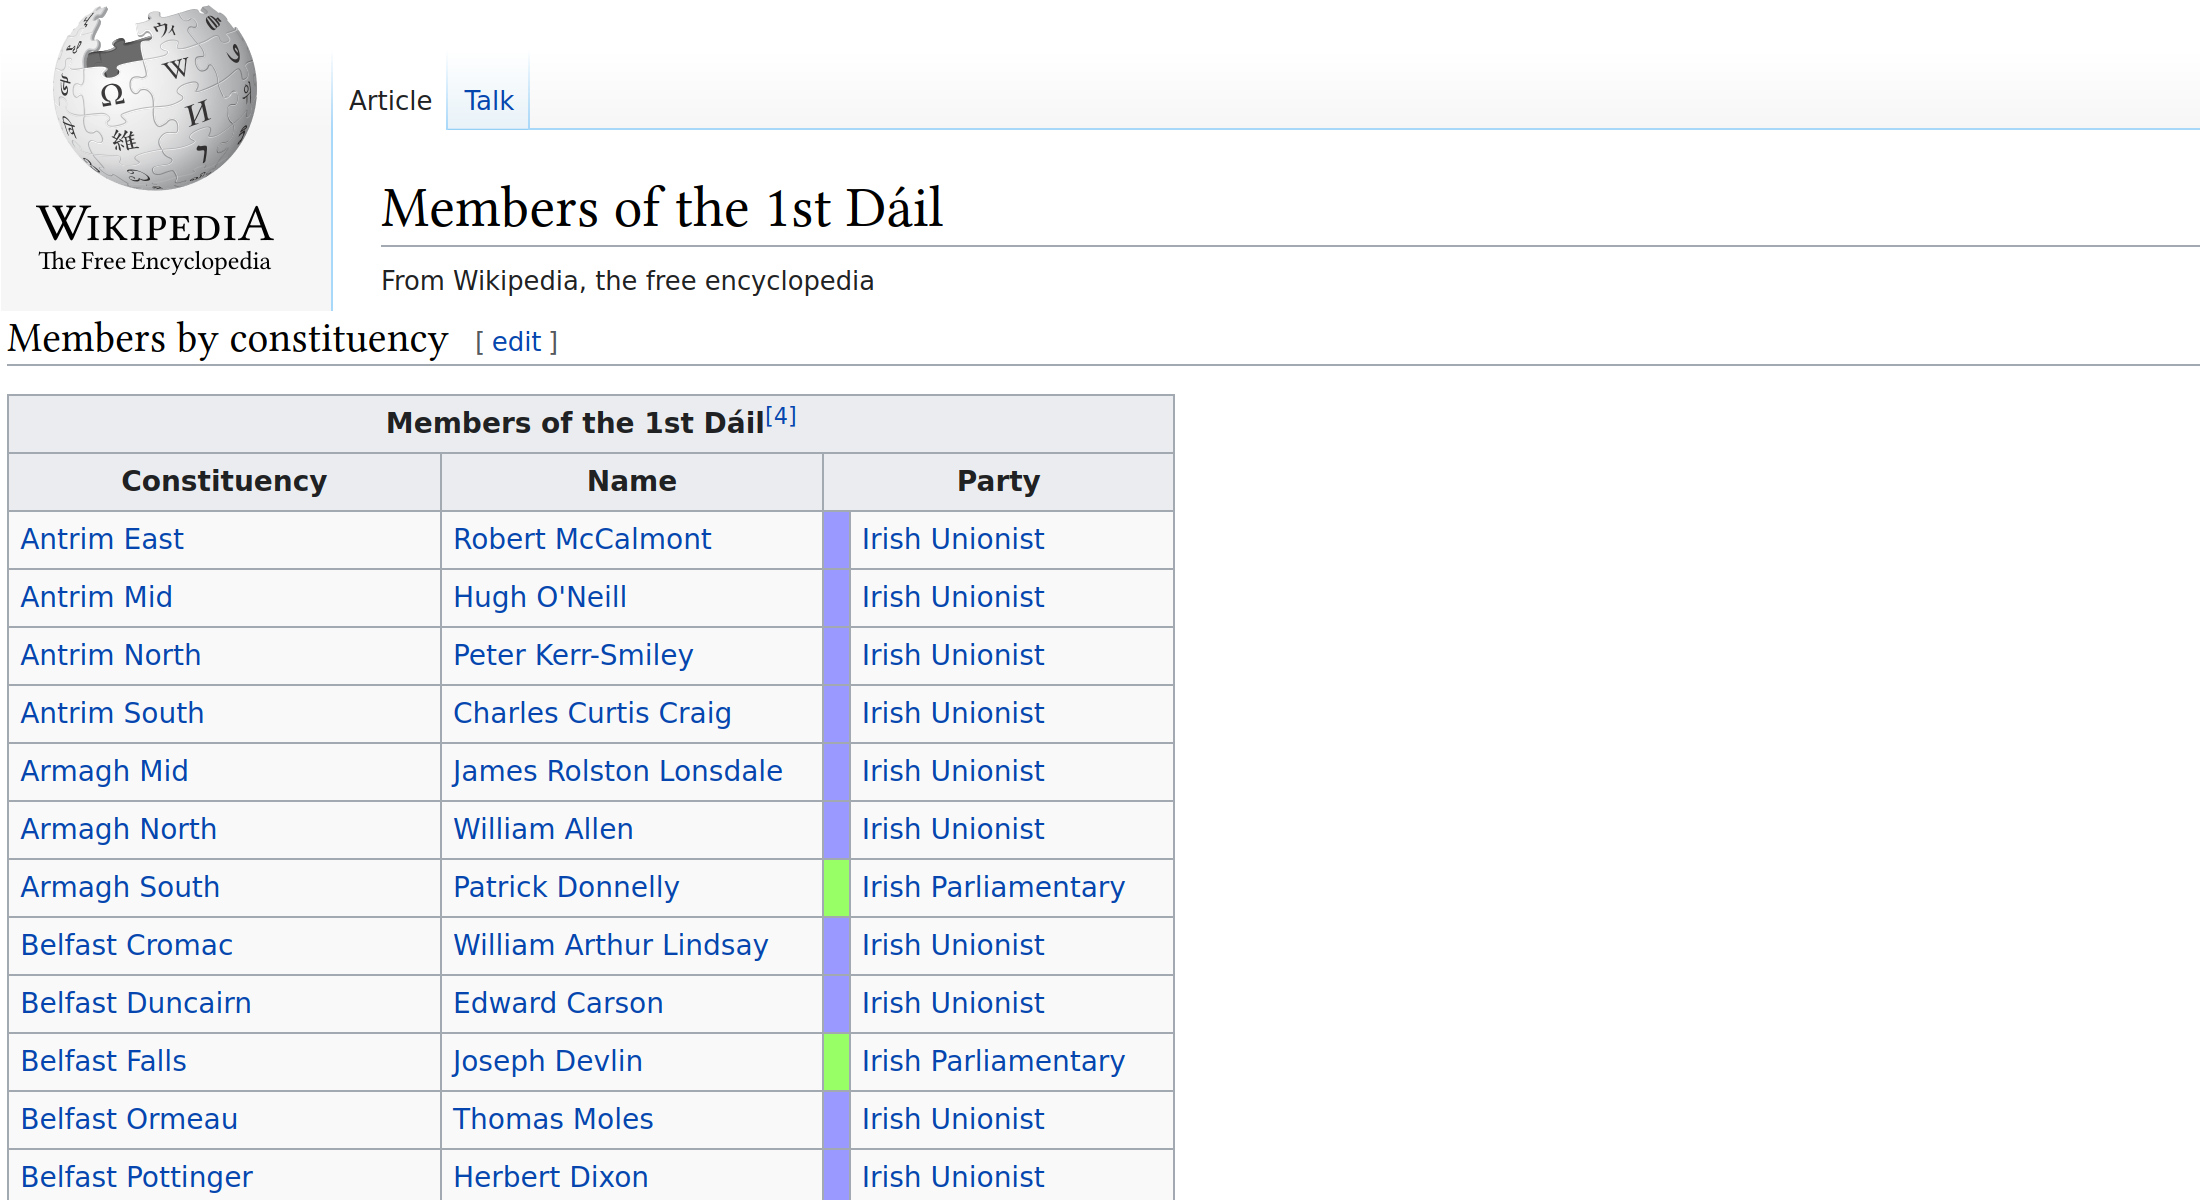
<figcaption aria-hidden="true">(<a
href="https://en.wikipedia.org/wiki/Members_of_the_1st_D%C3%A1il">Wikipedia</a>)</figcaption>
</figure>

## Unstructured Data

<figure>
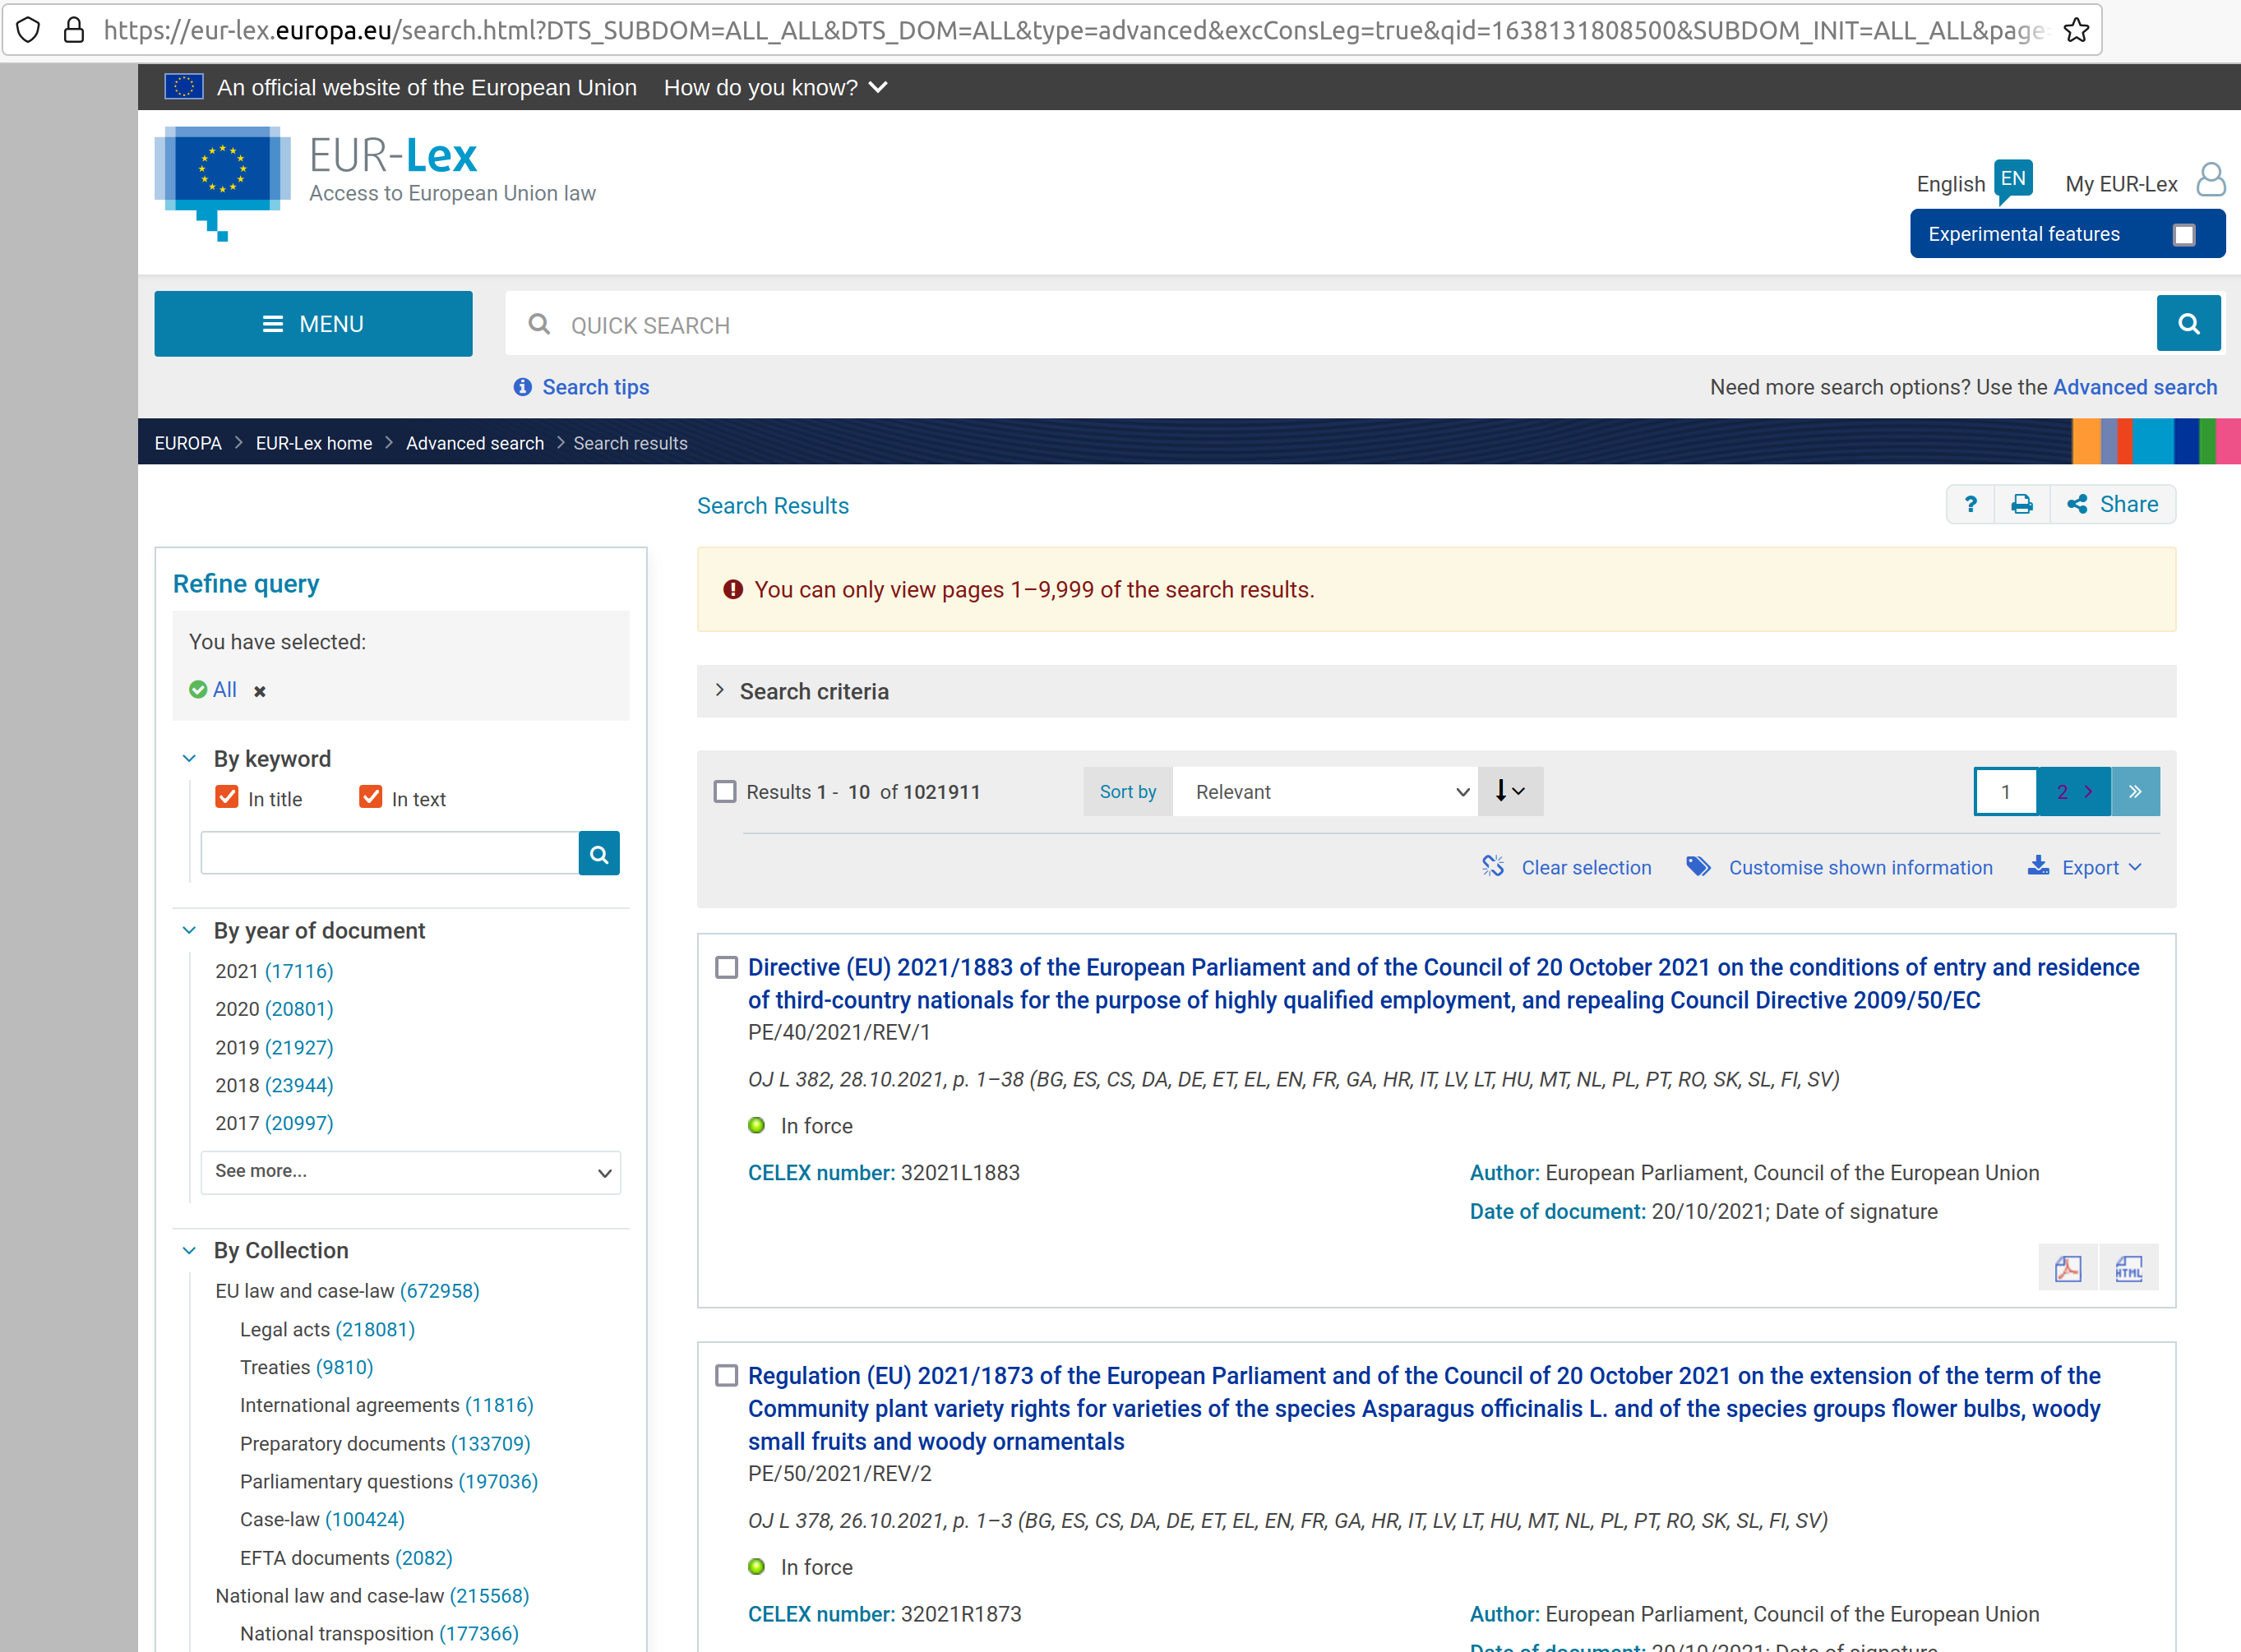
<figcaption aria-hidden="true">(<a
href="https://eur-lex.europa.eu/advanced-search-form.html">Eur-Lex</a>)</figcaption>
</figure>

## Interactive Webpages

<figure>
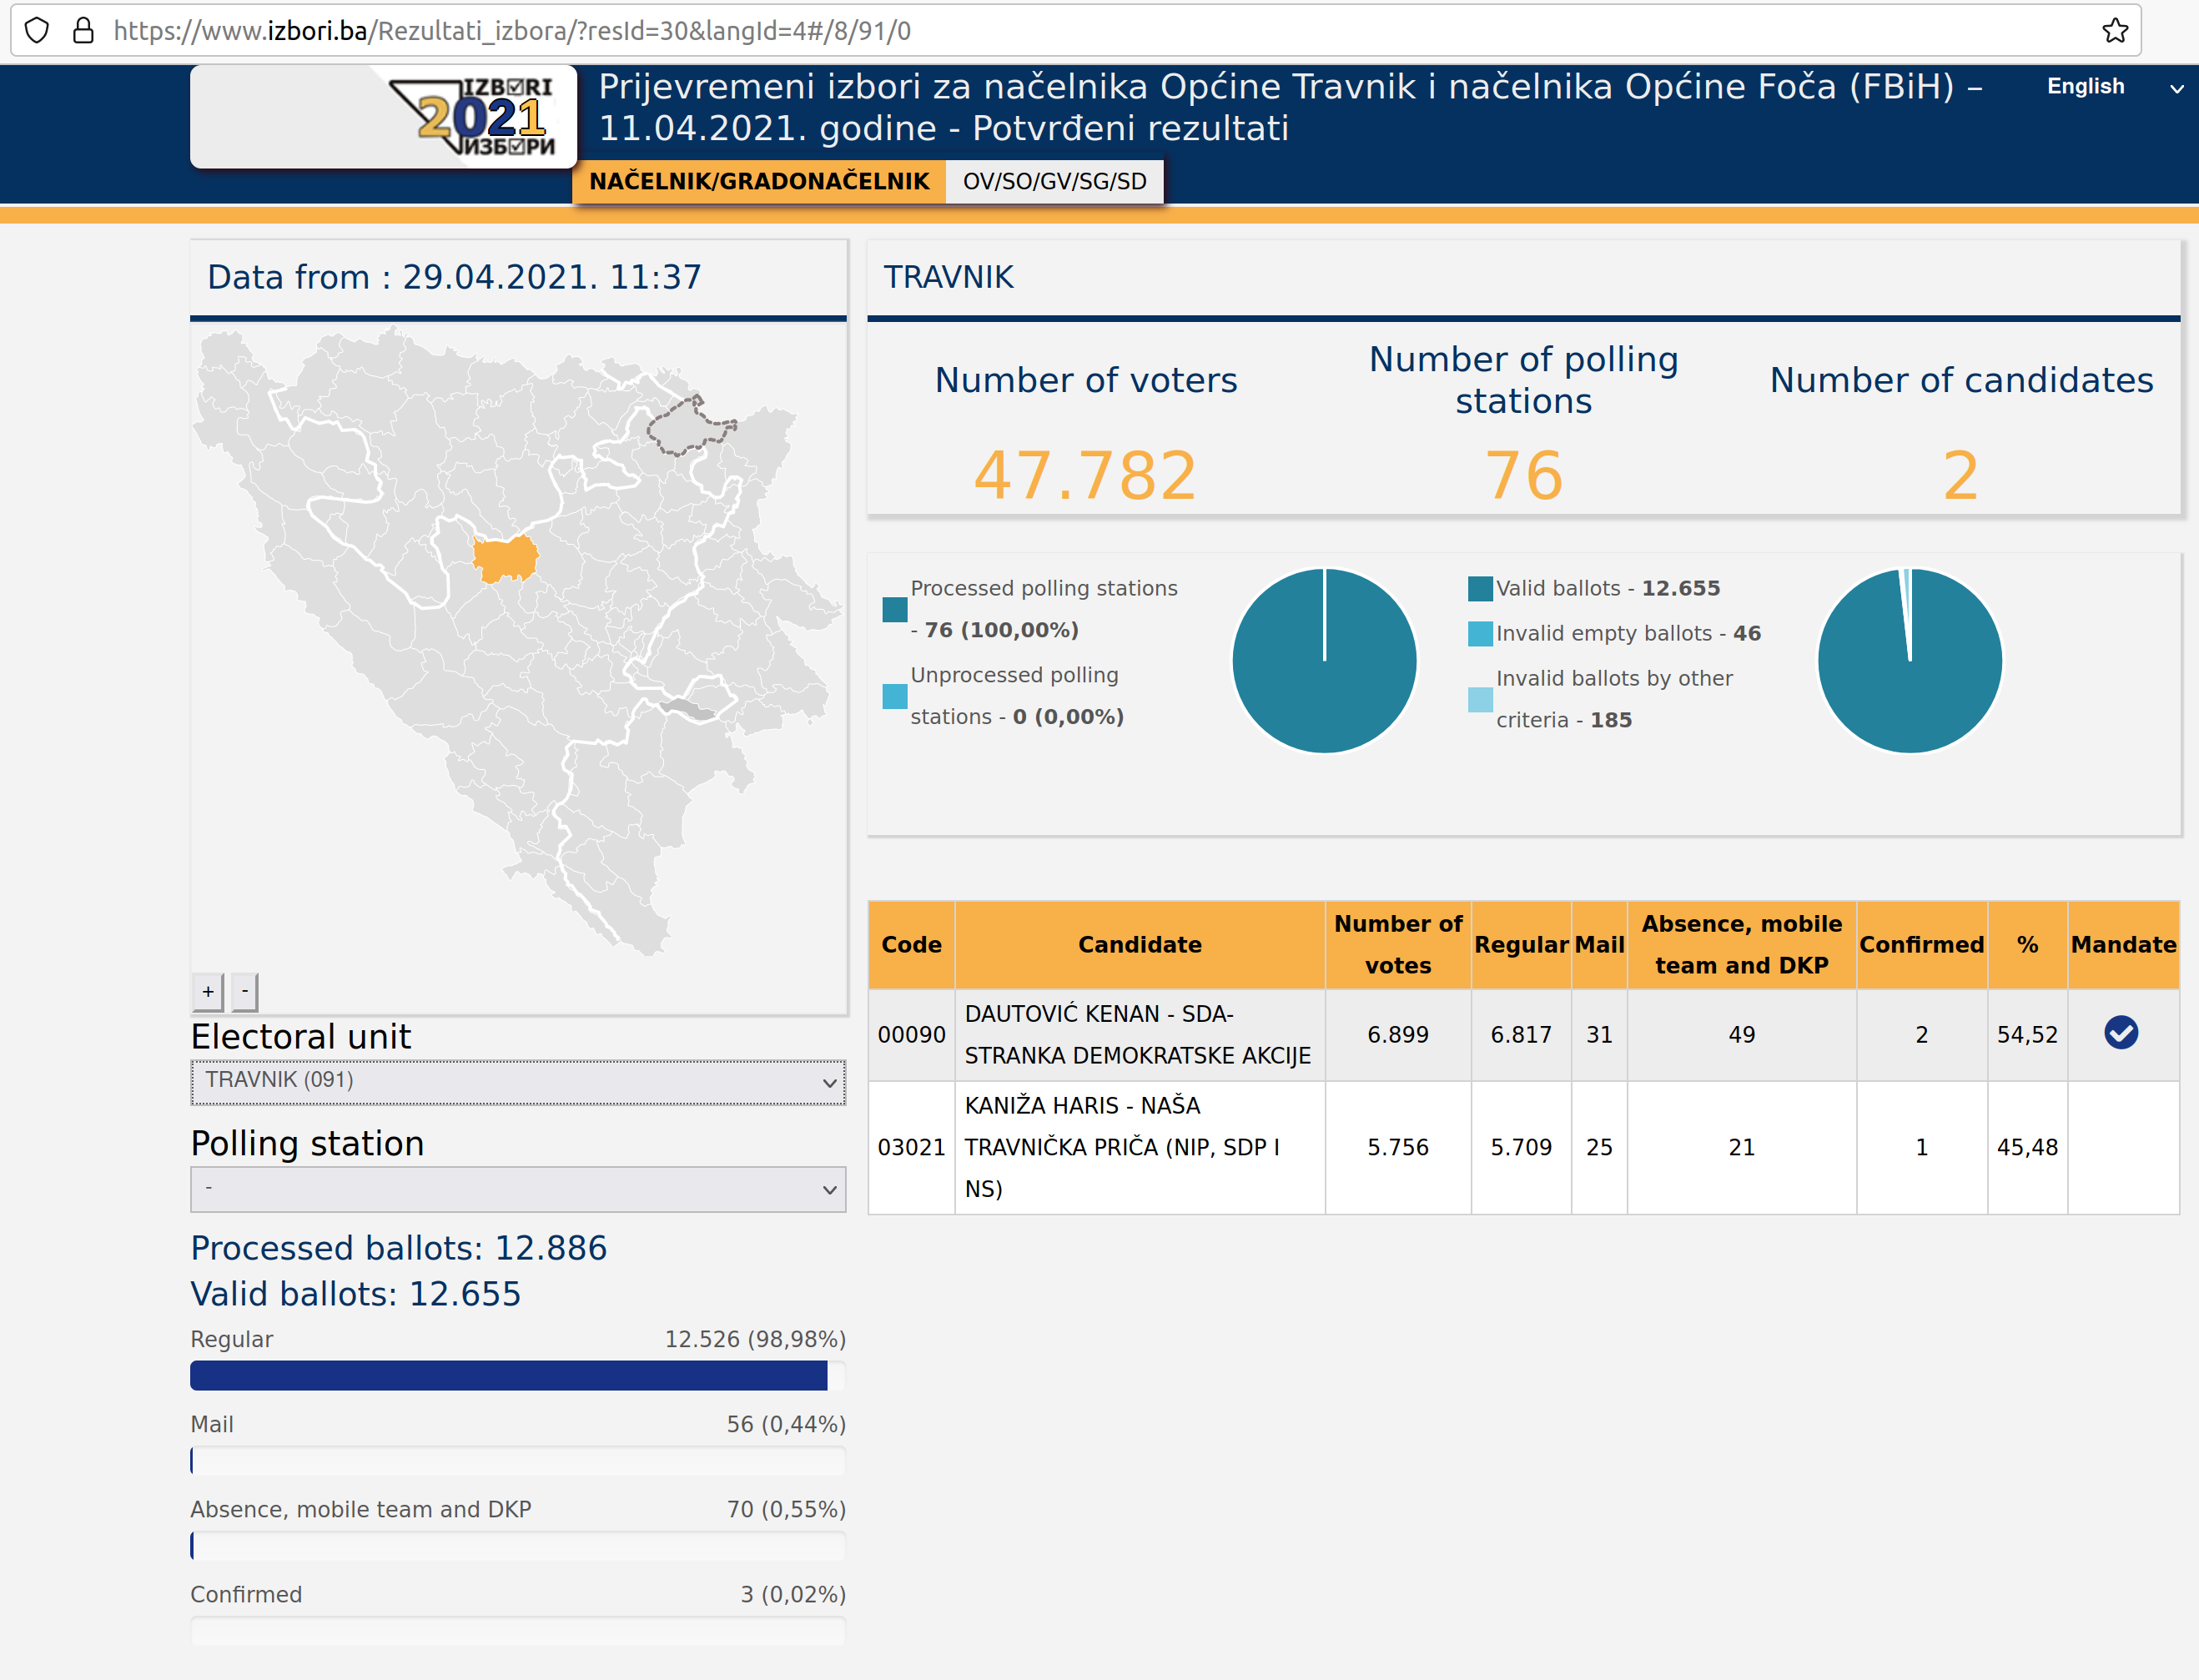
<figcaption aria-hidden="true">(<a
href="https://www.izbori.ba/Rezultati_izbora/">Izbori.ba</a>)</figcaption>
</figure>

## Automated Data Collection

-   Manual scraping (copy-pasting) can be:
    -   Extremely laborious and time-consuming
    -   Very error-prone
    -   Often impossible to reproduce exactly
-   Automated data collection
    -   Easy to scale up (computer time is cheap)
    -   Less error-prone
    -   Usually, perfectly reproducible
-   There is a trade-off (time invested in automation vs time saved)
    -   However, it is good to err on the side of automation

## Web Technologies

-   Key technologies used to disseminate content on the Web:
    -   XML/HTML (E**x**tensible **M**arkup
        **L**anguage/**H**yper**t**ext **M**arkup **L**anguage)
    -   CSS (**C**ascading **S**tyle **S**heets)
    -   JavaScript
    -   API (**A**pplication **P**rogramming **I**nterface)
    -   JSON (**J**ava**S**cript **O**bject **N**otation)

## Static vs Dynamic Websites

-   The critical feature of a website which determines approach to
    scraping its content
-   *Static* websites all have prebuild source code which is served at
    user’s request
    -   No real-time processing of user’s input
    -   They can contain elements that change the appearance of a
        website
    -   Example: [POP77142 website](https://tom.paskhal.is/POP77142)
-   *Dynamic* websites render websites in real-time as a response to
    user’s input
    -   They can use a range of technologies to achieve it (JavaScript,
        Python Django, PHP)
    -   Example: [Google Maps](https://www.google.com/maps)

## HTML: Hypertext Markup Language

-   HTML (**H**yper**t**ext **M**arkup **L**anguage) is a mark-up
    language for webpages
-   Forms the basis of static websites
-   Your browser renders (interprets) HTML for viewing
-   Current version is HTML5

<!-- -->

    <!DOCTYPE html> 
    <html>
        <head>
            <title>A title</title> 
        </head>
        <body>
            <h1 style="color:Red;">A heading</h1> 
            <p>A paragraph.</p> 
        </body>
    </html>

> **Extra**
>
> [W3Schools: Try
> HTML](https://www.w3schools.com/html/tryit.asp?filename=tryhtml_intro)

## HTML Basics

-   Basic unit of HTML is an *element* (aka *node*)
-   Elements, typically, begin with an *start tag* (e.g. `<h1>`)
-   And finish with an *end tag* (e.g. `</h1>`)
-   Content of an element is found between the start and end tags
-   *Attributes* are special words used within a start tag to control
    element’s behaviour (e.g. `style="color:Red;"`)
-   Soma HTML tag exampes:
    -   Document structure: `<html>`, `<body>`, `<header>`
    -   Document components: `<h1>`, `<title>`, `<div>`
    -   Text style: `<b>`, `<i>`
    -   Hyperlinks: `<a>`

## HTML tree

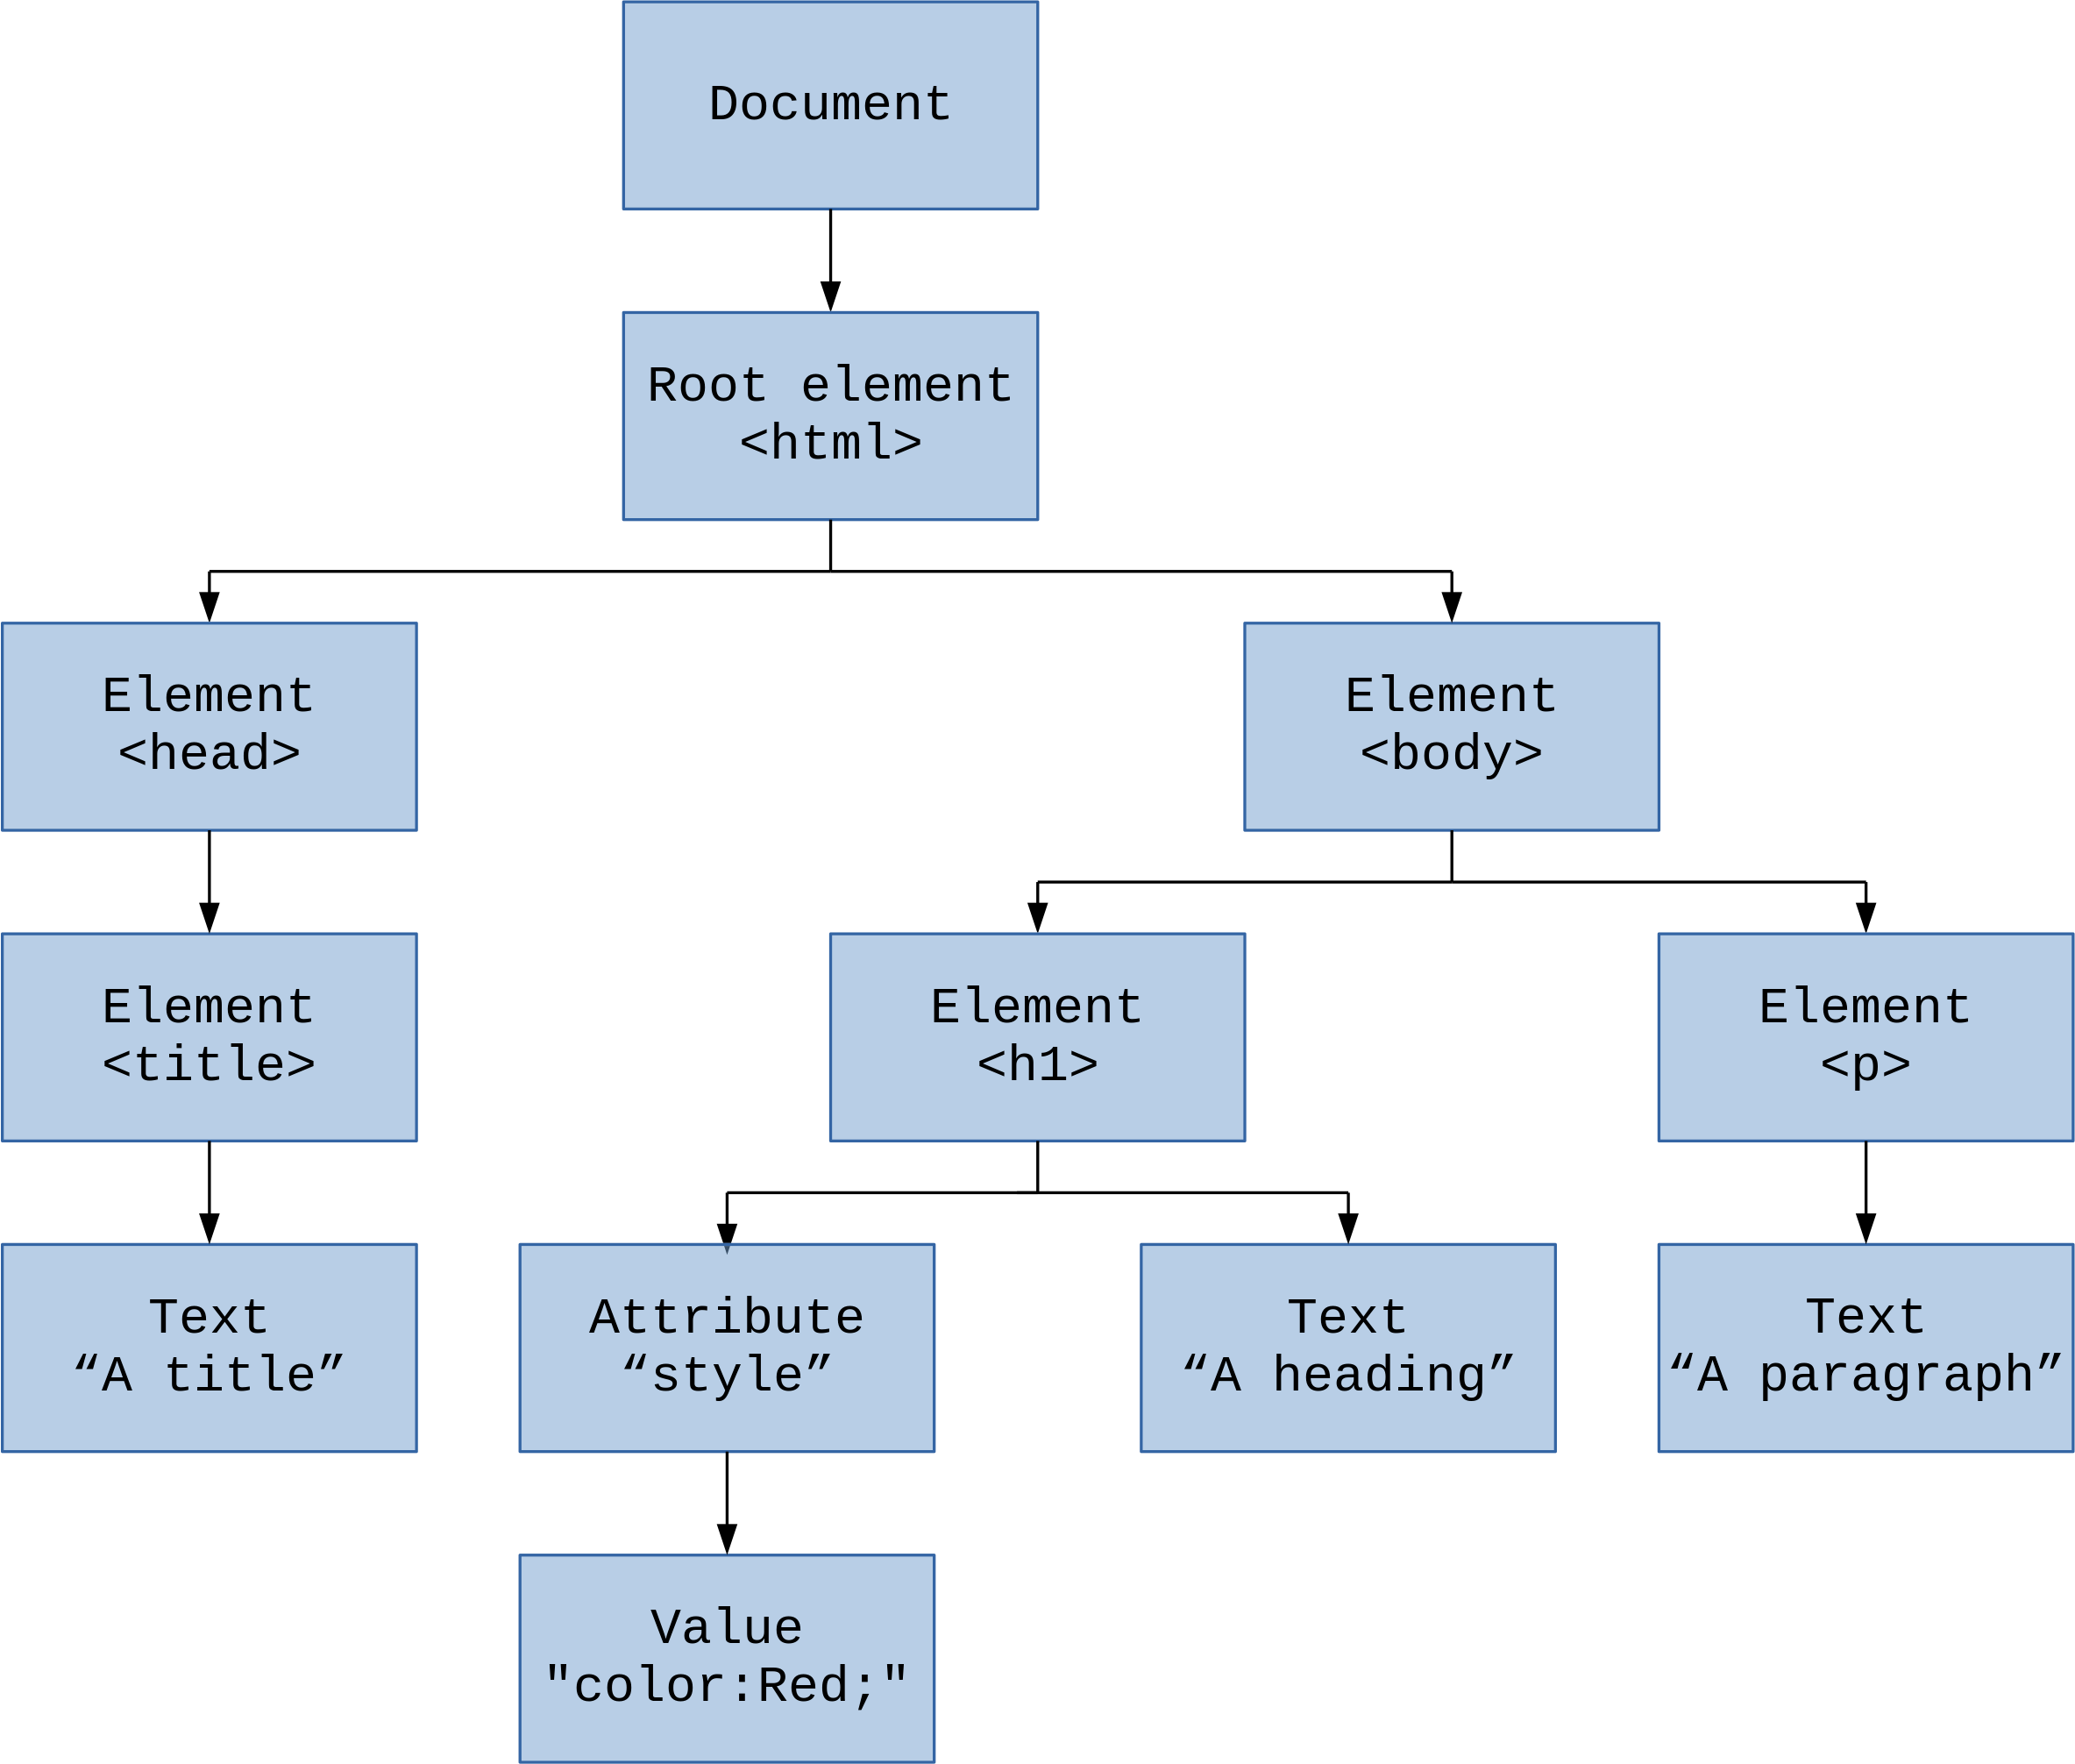

## HTML Tree Relationships

-   All elements (nodes) in HTML tree are connected by relationships
-   These relationship can be of the following types:
    -   Ancestors (parents)
    -   Descendants (children)
    -   Siblings

## HTML Parent/Ancestor

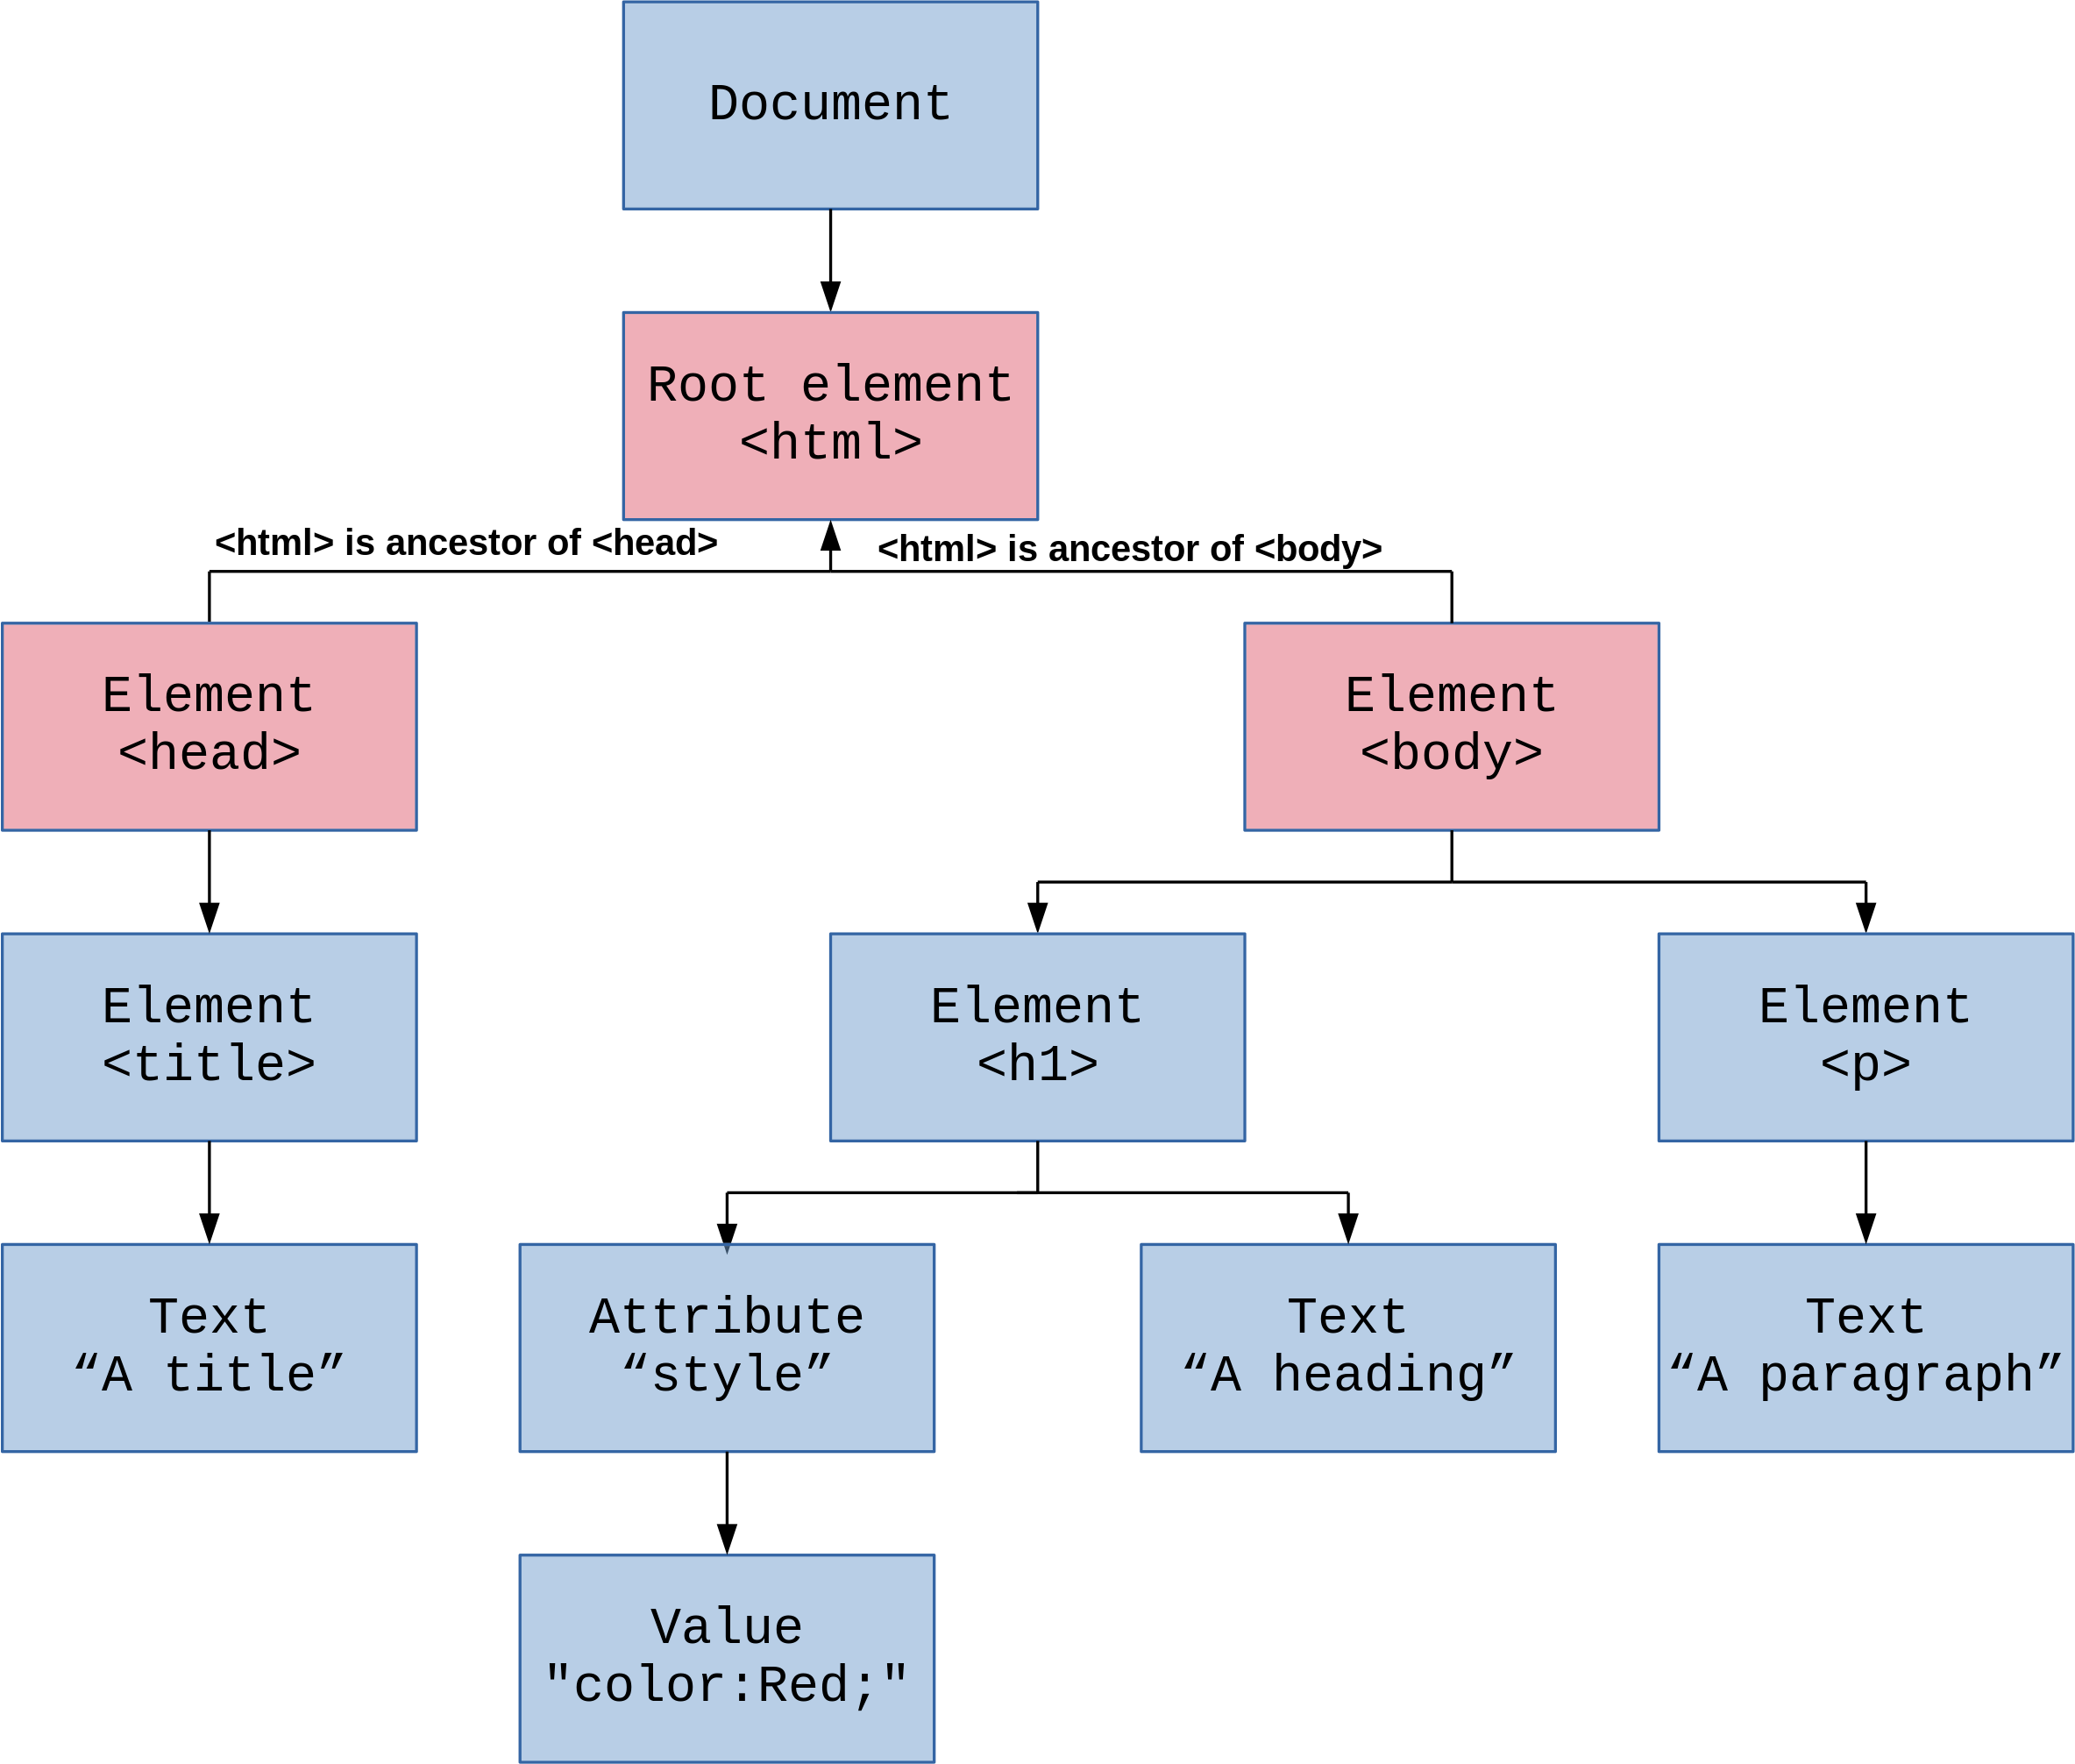

## HTML Children/Descendants

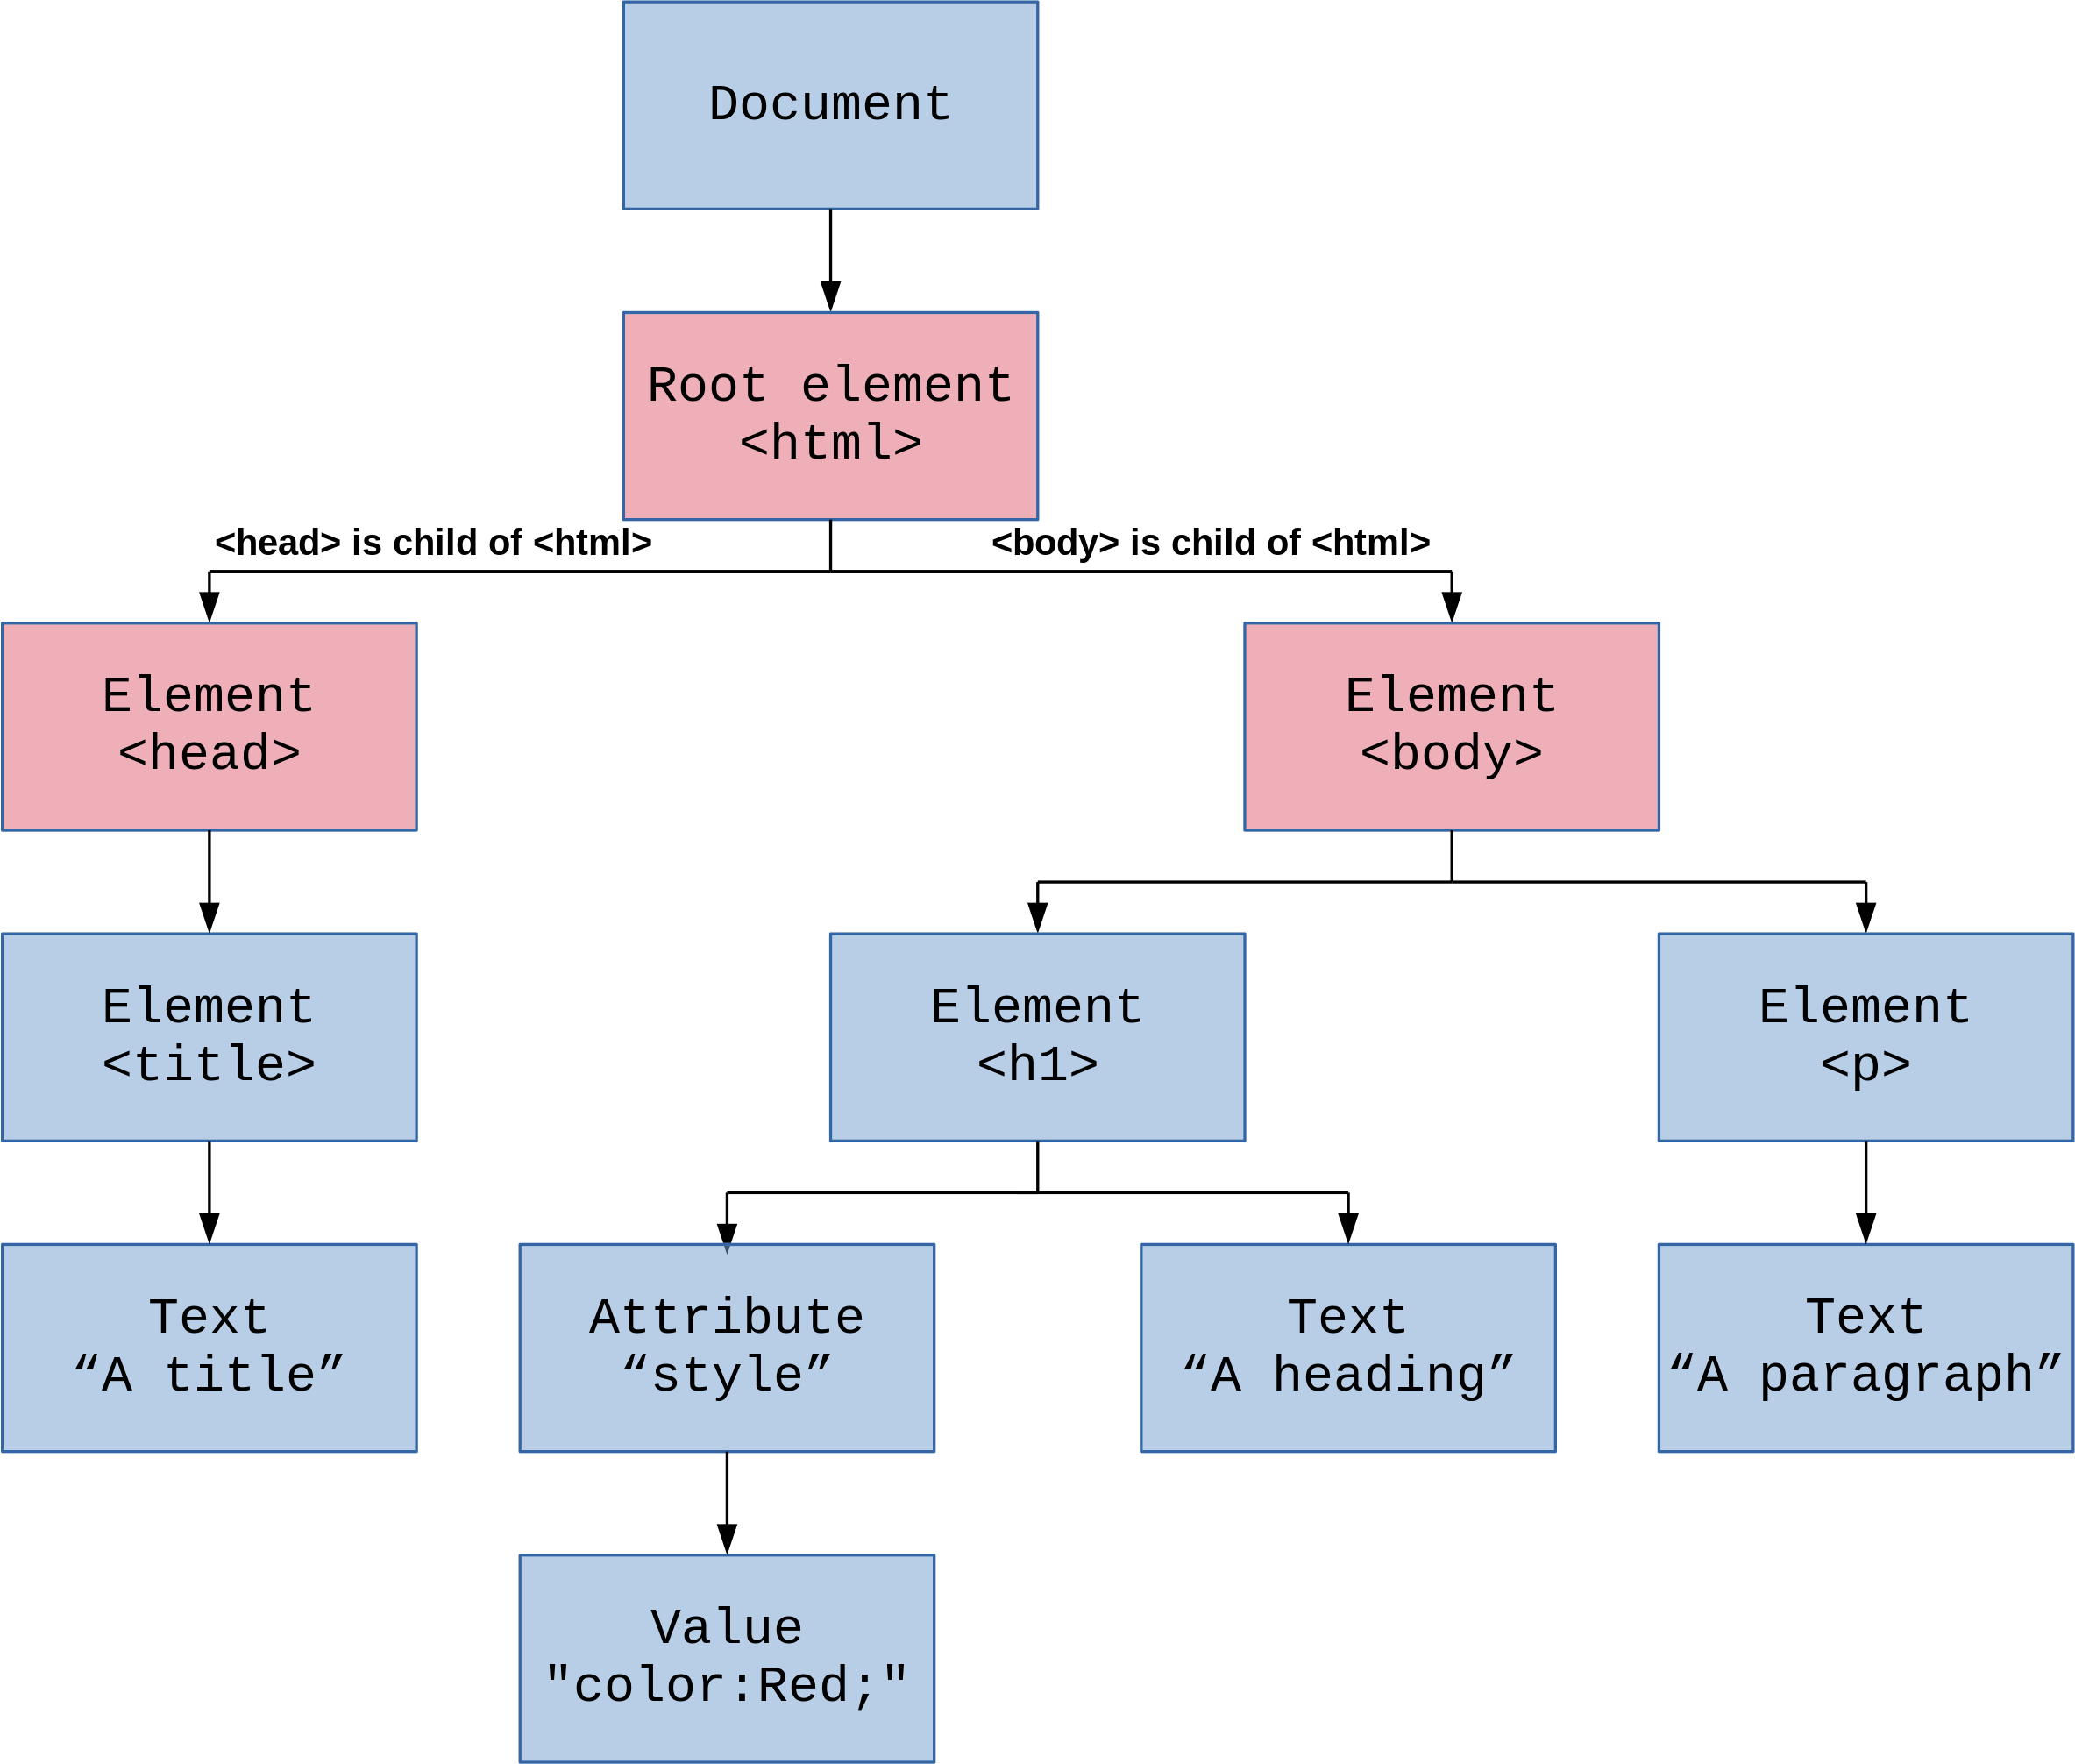

## HTML Siblings

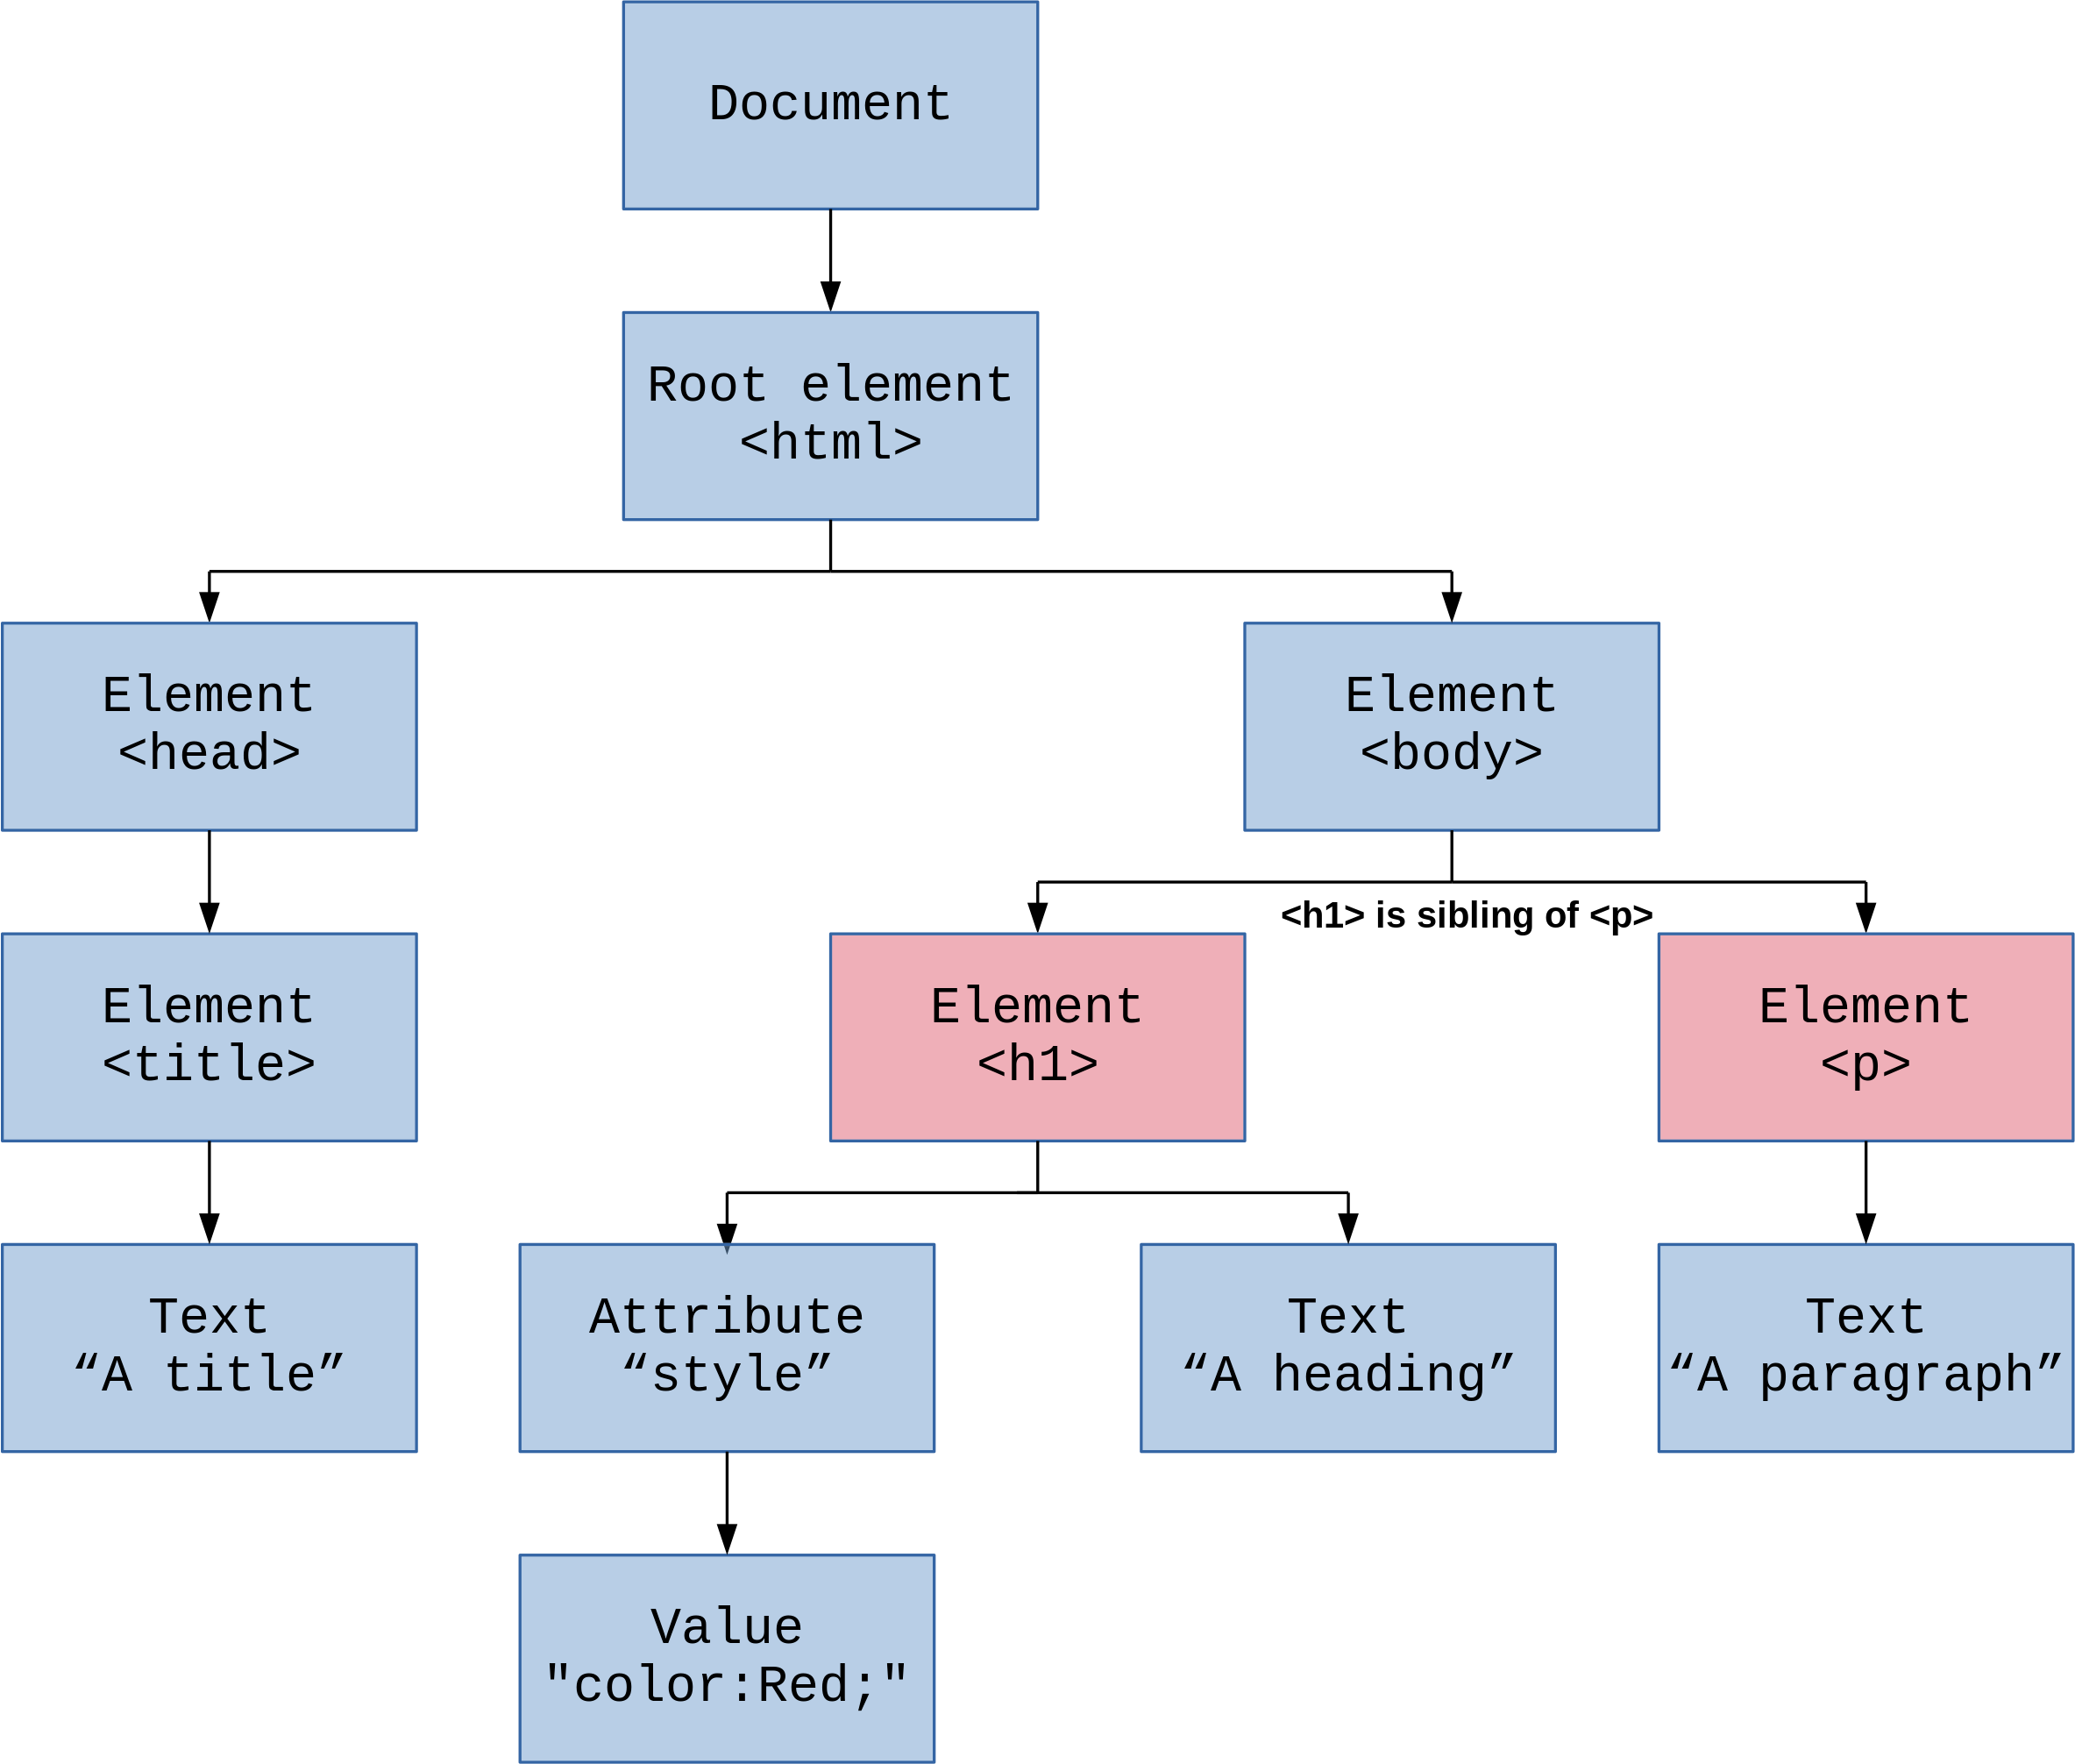

## Parsing HTML Tree: Example

In [ ]:
library("rvest")


Attaching package: 'rvest'

The following object is masked from 'package:readr':

    guess_encoding

. . .

In [ ]:
html_txt <- "
<!DOCTYPE html> 
<html>
    <head>
        <title>A title</title> 
    </head>
    <body>
        <h1 style='color:Red;'>A heading</h1> 
        <p>A paragraph.</p> 
    </body>
</html>"

. . .

In [ ]:
html <- rvest::read_html(html_txt)

. . .

In [ ]:
str(html)

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"

## Parsing HTML Tree: Example

In [ ]:
children <- rvest::html_children(html)
children

{xml_nodeset (2)}
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n        <h1 style="color:Red;">A heading</h1> \n        <p>A para ...

. . .

In [ ]:
body <- children[2]
rvest::html_name(body)

[1] "body"

. . .

In [ ]:
children2 <- rvest::html_children(body)
children2

{xml_nodeset (2)}
[1] <h1 style="color:Red;">A heading</h1>
[2] <p>A paragraph.</p>

. . .

In [ ]:
rvest::html_attrs(children2[1])

[[1]]
       style 
"color:Red;" 

. . .

In [ ]:
rvest::html_text(children2[1])

[1] "A heading"

## XML: Extensible Markup Language

-   XML (E**x**tensible **M**arkup **L**anguage) is a more general form
    of markup language
-   Allows sharing structured data of tree-like form
-   Relative to HTML:
    -   Tags are user-defined
    -   End tags are always required
    -   Stricter (no inconsistencies permitted)

    <?xml version="1.0" encoding="UTF-8" ?>
    <courses> 
        <course> 
            <title>Computer Programming for Social Scientists</title> 
            <code>POP77001</code> 
            <year>2024</year> 
            <term>Michaelmas</term> 
            <description>Course on computer programming in Python and R.</description> 
        </course> 
        <course> 
            <title>Quantitative Text Analysis for Social Scientists</title> 
            <code>POP77142</code> 
            <year>2025</year> 
            <term>Hillary</term> 
            <description>Introduction to text analysis.</description> 
        </course> 
    </courses>

## Parsing XML Tree: Example

In [ ]:
library("xml2")

. . .

In [ ]:
xml_txt <- 
'<?xml version="1.0" encoding="UTF-8" ?>
<courses> 
    <course> 
        <title>Computer Programming for Social Scientists</title> 
        <code>POP77001</code> 
        <year>2024</year> 
        <term>Michaelmas</term> 
        <description>Course on computer programming in Python and R.</description> 
    </course> 
    <course> 
        <title>Quantitative Text Analysis for Social Scientists</title> 
        <code>POP77142</code> 
        <year>2025</year> 
        <term>Hillary</term> 
        <description>Introduction to text analysis.</description> 
    </course> 
</courses>'

. . .

In [ ]:
xml <- xml2::read_xml(xml_txt)

. . .

In [ ]:
str(xml)

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"

## Parsing XML Tree: Example

In [ ]:
children3 <- xml2::xml_children(xml)
children3

{xml_nodeset (2)}
[1] <course>\n  <title>Computer Programming for Social Scientists</title>\n   ...
[2] <course>\n  <title>Quantitative Text Analysis for Social Scientists</titl ...

. . .

In [ ]:
pop77001 <- children3[1]
xml2::xml_children(pop77001)

{xml_nodeset (5)}
[1] <title>Computer Programming for Social Scientists</title>
[2] <code>POP77001</code>
[3] <year>2024</year>
[4] <term>Michaelmas</term>
[5] <description>Course on computer programming in Python and R.</description>

. . .

In [ ]:
xml2::xml_text(xml_children(children3[1]))

[1] "Computer Programming for Social Scientists"     
[2] "POP77001"                                       
[3] "2024"                                           
[4] "Michaelmas"                                     
[5] "Course on computer programming in Python and R."

## Examples of XML

-   RSS (**R**eally **S**imple **S**yndication) feeds
-   SVG (**S**calable **V**ector **G**raphics) images
-   Modern office documents (Microsoft Office `.docx`, `.xlsx`, `.pptx`,
    OpenOffice/LibreOffice)

## Parsing XML/HTML with XPath

-   XPath (XML Path Language) is a language for selecting parts of
    XML/HTML tree
-   Basic syntax:
    -   `/` - select element at the root node (e.g. `/html/body`)
    -   `//` - select element at any depth (e.g. `//h1`)
    -   `//<tag>/*` - select all descendants of tag (e.g. `//body/*`)
    -   `//<tag>[@<attr>]` - select all elements that have given
        attribute (e.g. `//h1[@style]`)
    -   `//<tag>[@<attr>='<value>']` - select all elements, whose
        attribute has given value (e.g. `//h1[@style='color:Red;']`)

> **Extra**
>
> [XPath syntax](https://www.w3schools.com/xml/xpath_syntax.asp)

## Parsing XML/HTML with XPath: Example

In [ ]:
rvest::html_elements(html, xpath = "//p")

{xml_nodeset (1)}
[1] <p>A paragraph.</p>

. . .

In [ ]:
rvest::html_elements(html, xpath = "//h1[@style='color:Red;']")

{xml_nodeset (1)}
[1] <h1 style="color:Red;">A heading</h1>

. . .

In [ ]:
xml2::xml_find_all(xml, xpath = "//code")

{xml_nodeset (2)}
[1] <code>POP77001</code>
[2] <code>POP77142</code>

. . .

In [ ]:
# We can also find elements by text
xml2::xml_find_all(xml, xpath = "//code[text()='POP77001']")

{xml_nodeset (1)}
[1] <code>POP77001</code>

## Scraping Webpage

<figure>
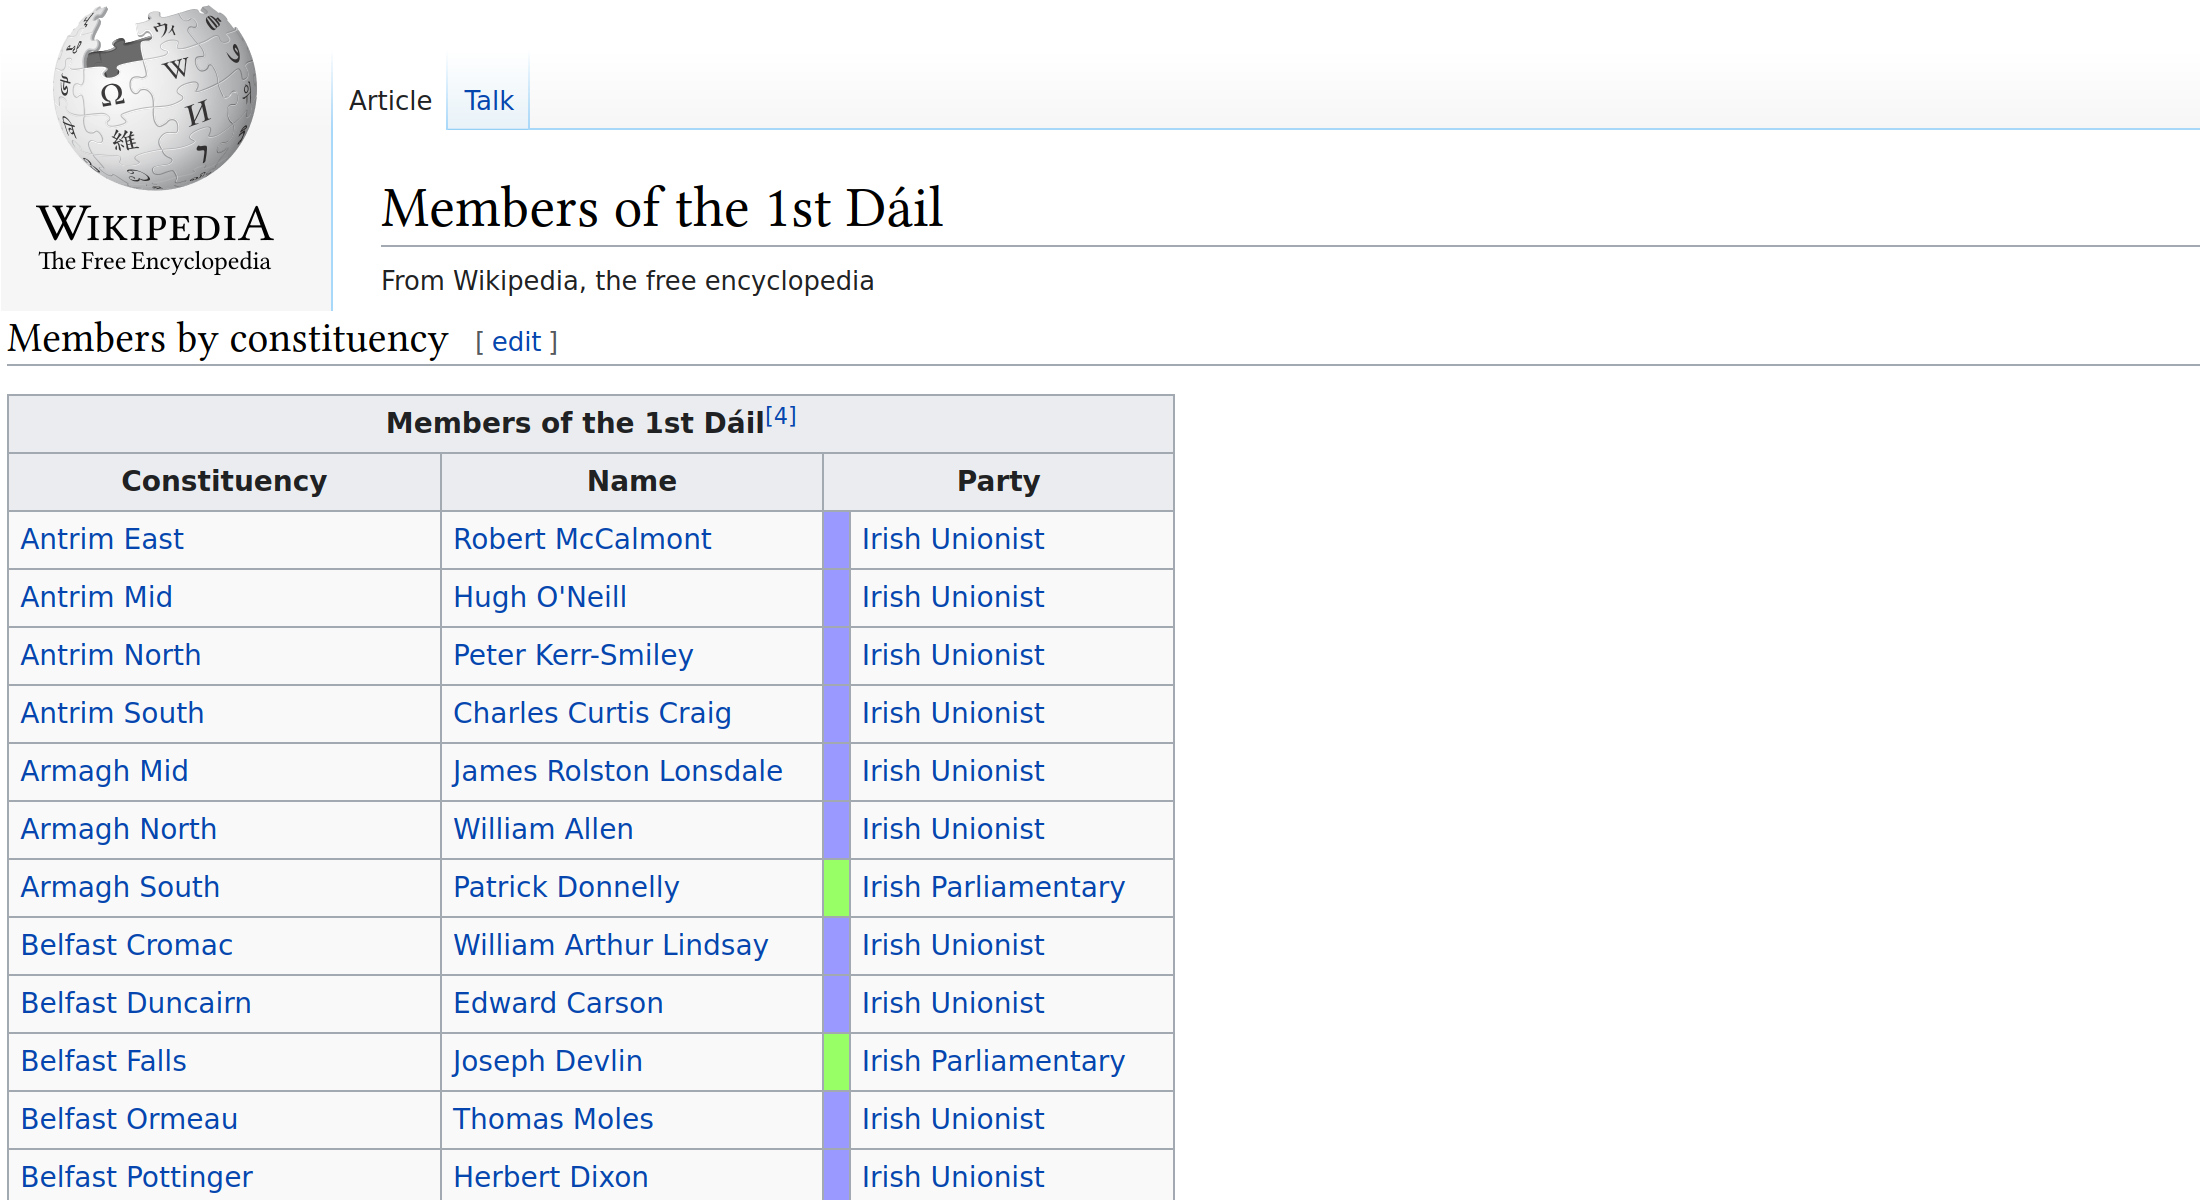
<figcaption aria-hidden="true">(<a
href="https://en.wikipedia.org/wiki/Members_of_the_1st_D%C3%A1il">Wikipedia</a>)</figcaption>
</figure>

## Scraping Webpage with XPath: Example

In [ ]:
html <- rvest::read_html("https://en.wikipedia.org/wiki/Members_of_the_1st_D%C3%A1il")

. . .

In [ ]:
tables <- rvest::html_elements(html, xpath = "//table")
tables

{xml_nodeset (8)}
[1] <table class="box-More_citations_needed plainlinks metadata ambox ambox-c ...
[2] <table class="infobox vevent"><tbody>\n<tr><th colspan="2" class="infobox ...
[3] <table style="width:100%; border-collapse:collapse"><tbody><tr style="ver ...
[4] <table class="wikitable" style="font-size: 95%;"><tbody>\n<tr>\n<th colsp ...
[5] <table class="wikitable sortable"><tbody>\n<tr>\n<th rowspan="2">Constitu ...
[6] <table class="wikitable"><tbody>\n<tr>\n<th>Constituency\n</th>\n<th>Outg ...
[7] <table class="wikitable"><tbody>\n<tr>\n<th>Winner\n</th>\n<th colspan="2 ...
[8] <table class="nowraplinks mw-collapsible autocollapse navbox-inner" style ...

. . .

In [ ]:
tbody <- rvest::html_children(tables[5])
tbody

{xml_nodeset (1)}
[1] <tbody>\n<tr>\n<th rowspan="2">Constituency\n</th>\n<th rowspan="2">Name\ ...

. . .

In [ ]:
tds <- rvest::html_table(tbody)
tds

[[1]]
# A tibble: 109 × 8
   Constituency   Name          Portrait `Party affiliation` `Party affiliation`
   <chr>          <chr>         <chr>    <chr>               <chr>              
 1 Constituency   Name          "Portra… "Start of Dáil ter… Start of Dáil term 
 2 Antrim East    Robert McCal… ""       ""                  Irish Unionist     
 3 Antrim East    George Hanna  ""       "Elected in 1919 b… Elected in 1919 by…
 4 Antrim Mid     Hugh O'Neill  ""       ""                  Irish Unionist     
 5 Antrim North   Peter Kerr-S… ""       ""                  Irish Unionist     
 6 Antrim South   Charles Curt… ""       ""                  Irish Unionist     
 7 Armagh Mid     James Rolsto… ""       ""                  Irish Unionist     
 8 Armagh North   William Allen ""       ""                  Irish Unionist     
 9 Armagh South   Patrick Donn… ""       ""                  Irish Parliamentary
10 Belfast Cromac William Arth… ""       ""                  Irish Unionist     
# 

## Scraping Webpage with XPath: Example

In [ ]:
str(tds)

List of 1
 $ : tibble [109 × 8] (S3: tbl_df/tbl/data.frame)
  ..$ Constituency     : chr [1:109] "Constituency" "Antrim East" "Antrim East" "Antrim Mid" ...
  ..$ Name             : chr [1:109] "Name" "Robert McCalmont" "George Hanna" "Hugh O'Neill" ...
  ..$ Portrait         : chr [1:109] "Portrait" "" "" "" ...
  ..$ Party affiliation: chr [1:109] "Start of Dáil term" "" "Elected in 1919 by-electionas Independent Unionist" "" ...
  ..$ Party affiliation: chr [1:109] "Start of Dáil term" "Irish Unionist" "Elected in 1919 by-electionas Independent Unionist" "Irish Unionist" ...
  ..$ Party affiliation: chr [1:109] "End of Dáil term" "Resigned in 1919" "" "" ...
  ..$ Party affiliation: chr [1:109] "End of Dáil term" "Resigned in 1919" "Ulster Unionist" "Ulster Unionist" ...
  ..$ Assumed office   : chr [1:109] "Assumed office" "Abstained" "Abstained" "Abstained" ...

. . .

In [ ]:
tds <- tds[[1]]
head(tds)

# A tibble: 6 × 8
  Constituency Name             Portrait `Party affiliation` `Party affiliation`
  <chr>        <chr>            <chr>    <chr>               <chr>              
1 Constituency Name             "Portra… "Start of Dáil ter… Start of Dáil term 
2 Antrim East  Robert McCalmont ""       ""                  Irish Unionist     
3 Antrim East  George Hanna     ""       "Elected in 1919 b… Elected in 1919 by…
4 Antrim Mid   Hugh O'Neill     ""       ""                  Irish Unionist     
5 Antrim North Peter Kerr-Smil… ""       ""                  Irish Unionist     
6 Antrim South Charles Curtis … ""       ""                  Irish Unionist     
# ℹ 3 more variables: `Party affiliation` <chr>, `Party affiliation` <chr>,
#   `Assumed office` <chr>

## Scraping Webpage with XPath: Example

In [ ]:
colnames(tds) <- tds[1,]
tds <- tds[-1,]
head(tds)

# A tibble: 6 × 8
  Constituency Name           Portrait `Start of Dáil term` `Start of Dáil term`
  <chr>        <chr>          <chr>    <chr>                <chr>               
1 Antrim East  Robert McCalm… ""       ""                   Irish Unionist      
2 Antrim East  George Hanna   ""       "Elected in 1919 by… Elected in 1919 by-…
3 Antrim Mid   Hugh O'Neill   ""       ""                   Irish Unionist      
4 Antrim North Peter Kerr-Sm… ""       ""                   Irish Unionist      
5 Antrim South Charles Curti… ""       ""                   Irish Unionist      
6 Armagh Mid   James Rolston… ""       ""                   Irish Unionist      
# ℹ 3 more variables: `End of Dáil term` <chr>, `End of Dáil term` <chr>,
#   `Assumed office` <chr>

. . .

In [ ]:
tds <- tds[,-3]
str(tds)

tibble [108 × 7] (S3: tbl_df/tbl/data.frame)
 $ Constituency      : chr [1:108] "Antrim East" "Antrim East" "Antrim Mid" "Antrim North" ...
 $ Name              : chr [1:108] "Robert McCalmont" "George Hanna" "Hugh O'Neill" "Peter Kerr-Smiley" ...
 $ Start of Dáil term: chr [1:108] "" "Elected in 1919 by-electionas Independent Unionist" "" "" ...
 $ Start of Dáil term: chr [1:108] "Irish Unionist" "Elected in 1919 by-electionas Independent Unionist" "Irish Unionist" "Irish Unionist" ...
 $ End of Dáil term  : chr [1:108] "Resigned in 1919" "" "" "" ...
 $ End of Dáil term  : chr [1:108] "Resigned in 1919" "Ulster Unionist" "Ulster Unionist" "Ulster Unionist" ...
 $ Assumed office    : chr [1:108] "Abstained" "Abstained" "Abstained" "Abstained" ...

## Web Scraping in Practice

-   Always check first whether an API for querying exists.
-   It is the most robust (and sanctioned) way of obtaining data.
-   Check copyrights and respect those when using scraped data.
-   Limit you scraping bandwidth (introduce waiting times between
    queries).

## Next

-   Tutorial: HTML and web scraping
-   Assignment 1: Due 15:59 on Wednesday, 26th March (submission on
    Blackboard)